# PoleFigurePhaseFractions.ipynb
Written by Adam Creuziger (adam.creuziger@nist.gov)

Oct 2017

    This data was developed by employees of the National Institute of Standards and Technology (NIST), an agency of the Federal Government. Pursuant to title 17 United States Code Section 105, works of NIST employees are not subject to copyright protection in the United States and are considered to be in the public domain.

    The data is provided by NIST as a public service and is expressly provided "AS IS." NIST MAKES NO WARRANTY OF ANY KIND, EXPRESS, IMPLIED OR STATUTORY, INCLUDING, WITHOUT LIMITATION, THE IMPLIED WARRANTY OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE, NON-INFRINGEMENT AND DATA ACCURACY. NIST does not warrant or make any representations regarding the use of the data or the results thereof, including but not limited to the correctness, accuracy, reliability or usefulness of the data. NIST SHALL NOT BE LIABLE AND YOU HEREBY RELEASE NIST FROM LIABILITY FOR ANY INDIRECT, CONSEQUENTIAL, SPECIAL, OR INCIDENTAL DAMAGES (INCLUDING DAMAGES FOR LOSS OF BUSINESS PROFITS, BUSINESS INTERRUPTION, LOSS OF BUSINESS INFORMATION, AND THE LIKE), WHETHER ARISING IN TORT, CONTRACT, OR OTHERWISE, ARISING FROM OR RELATING TO THE DATA (OR THE USE OF OR INABILITY TO USE THIS DATA), EVEN IF NIST HAS BEEN ADVISED OF THE POSSIBILITY OF SUCH DAMAGES.

    To the extent that NIST may hold copyright in countries other than the United States, you are hereby granted the non-exclusive irrevocable and unconditional right to print, publish, prepare derivative works and distribute the NIST data, in any medium, or authorize others to do so on your behalf, on a royalty-free basis throughout the world.

    You may improve, modify, and create derivative works of the data or any portion of the data, and you may copy and distribute such modifications or works. Modified works should carry a notice stating that you changed the data and should note the date and nature of any such change. Please explicitly acknowledge the National Institute of Standards and Technology as the source of the data: Data citation recommendations are provided below.

    Permission to use this data is contingent upon your acceptance of the terms of this agreement and upon your providing appropriate acknowledgments of NIST's creation of the data.


See: https://www.nist.gov/director/licensing

## Packages used in this Jupyter Notebook

In [ ]:
# Install packages not found in conda
# Only needs to be installed during first run
#pip install fortranformat
#pip install mplstereonet

## Need the development release of mplstereonet to work with matplotlib 3.2.2
## https://github.com/joferkington/mplstereonet/issues/34 
#pip install https://github.com/joferkington/mplstereonet/zipball/master

In [3]:
#import fortranformat as ff
import numpy as np 
import pandas as pd
import scipy as scipy
from scipy import interpolate 
from scipy import signal
import matplotlib.pyplot as plt
import mplstereonet
import math
import os
from importlib import reload
import seaborn as sns
print ('Finished')

Finished


In [4]:
# Custom modules
import TextureSampling
import PlotTexture

In [5]:
# When needed to after changes
reload(TextureSampling)
reload(PlotTexture)

<module 'PlotTexture' from '/Users/surya/Downloads/Texture-Sampling-PhaseMeasurement-BiasErrors/JupyterNotebooks/PlotTexture.py'>

### Test functions

In [26]:
# Sampling scheme test functions
TextureSampling.SingleOrientation("ND Single", 0.0,0.0)
TextureSampling.RingPerpND(5.0)
TextureSampling.RingPerpRD(5.0)
TextureSampling.RingPerpTD(5.0)
TextureSampling.TiltRotate("NoRotation-tilt60deg", 120.0, 1600.0, 0.0,60.0,56.0)
TextureSampling.HexGrid("HexGrid-90degTilt5degRes",90.0,15.0)
TextureSampling.SpiralGrid("Spiral",5.0, export=True)
TextureSampling.CLRGrid("CLR", 90.0, 5.0, export=True)
TextureSampling.BT8_HexGrid("Matthias", 90.0, 5.0, export=True)
TextureSampling.HexGrid("Rizzie", 90.0, 5.0, export=True)
TextureSampling.EqualAngleGrid("EA", 90.0, 5.0, export=True)
TextureSampling.RingRot(5.0,2.84623415, np.arange(-60, 61, 5 ),'Y',export=True)
TextureSampling.RingRot(5.0,2.84623415, np.arange(-90, 91, 5 ),'Y',export=True)
TextureSampling.RingRot(5.0,2.84623415, np.arange(-30, 31, 5 ),'Y',export=True)
#TextureSampling.EqualAngleGrid("Equal Angle",90.0,5.0)
#TextureSampling.CLRGrid("CLR",90.0, 5.0)
#TextureSampling.BT8_HexGrid("BT8", 90.0, 15.0)
#TextureSampling.SpiralScheme("Spiral", 90.0, 21600)
#TextureSampling.KlugAlexanderSpiral('Spiral', mirror=True, quadlock=True)
#TextureSampling.SpiralGrid("bb", 5.0)

('RotRing Axis-Y Res-5.0 Theta-2.84623415 OmegaMax-30',
           Tilt    Rotation  RotationIndex  Omega   Weights  mrd
 0    57.153766    0.000000              0    -30  0.001679    0
 1    57.153766  180.000000             36     30  0.001679    0
 2    57.283270    5.938574              1    -30  0.001672    0
 3    57.283270  174.061426             35     30  0.001672    0
 4    57.283270  185.938574             37     30  0.001672    0
 ..         ...         ...            ...    ...       ...  ...
 931  89.970149  275.751485             55     30  0.000146    0
 932  89.973527   54.899193             11      5  0.000963    0
 933  89.973527  234.899193             47     -5  0.000963    0
 934  89.973527  125.100807             25     -5  0.000963    0
 935  89.973527  305.100807             61      5  0.000963    0
 
 [936 rows x 6 columns])

In [ ]:
cwd=os.getcwd()
print(cwd)

In [ ]:
# Test functions that need a file path
cwd=os.getcwd()
#print cwd
xpcdatapath=os.path.abspath(os.path.join(cwd, '..', 'MAUD', 'XPCFiles'))
IntensitesPath=os.path.abspath(os.path.join(cwd, 'AveragedIntensites'))
XPCfile=os.path.join(xpcdatapath, "GossA-HW20.xpc")


## may need to fix pandas, seems  like pfs are a list not a dataframe
(pfs,hkllist)=TextureSampling.xpcformat('xpc',XPCfile)
print(pfs)
hkllist.index([1, 1, 1])


### 
#SchemeName,Coordinates=TextureSampling.HexGrid("HexGrid-90degTilt5degRes",60.0,21.0)
#TextureSampling.pfIntensitySum(SchemeName, pfs, Coordinates)

In [ ]:
print(list(pfs[1].iloc[18]))

In [20]:
# When needed to after changes
reload(TextureSampling)
reload(PlotTexture)

<module 'PlotTexture' from 'c:\\Users\\surya\\Downloads\\project\\Texture-Sampling-PhaseMeasurement-BiasErrors\\JupyterNotebooks\\PlotTexture.py'>

In [49]:
## test new mtex reader
cwd=os.getcwd()
from os import path
Mtexdatapath='C:\\Users\\surya\\Downloads\\project\\Texture-Sampling-PhaseMeasurement-BiasErrors\\Matlab\\MtexDataHW-2021Jun08\\Alpha1F-HW03'
(pfs,hkllist)=TextureSampling.mtexPFformat(Mtexdatapath)
print(hkllist)
#TextureSampling.mtexPFformat(mtexfolder)


Pole Figure Parsing
You are now reading experimental pole figure(s): 
	Alpha1F-HW3_(110).txt
You are now reading experimental pole figure(s): 
	Alpha1F-HW3_(200).txt
You are now reading experimental pole figure(s): 
	Alpha1F-HW3_(211).txt
You are now reading experimental pole figure(s): 
	Alpha1F-HW3_(220).txt
You are now reading experimental pole figure(s): 
	Alpha1F-HW3_(222).txt
You are now reading experimental pole figure(s): 
	Alpha1F-HW3_(310).txt
You are now reading experimental pole figure(s): 
	Alpha1F-HW3_(321).txt
You are now reading experimental pole figure(s): 
	Alpha1F-HW3_(400).txt
['HKL', [1, 1, 0], [2, 0, 0], [2, 1, 1], [2, 2, 0], [2, 2, 2], [3, 1, 0], [3, 2, 1], [4, 0, 0]]


In [ ]:
print(mtexfolder)

In [ ]:
### Test plotting functions 

In [51]:
# When needed to after changes
reload(TextureSampling)
reload(PlotTexture)

<module 'PlotTexture' from 'c:\\Users\\surya\\Downloads\\project\\Texture-Sampling-PhaseMeasurement-BiasErrors\\JupyterNotebooks\\PlotTexture.py'>

In [ ]:
fig = plt.figure(figsize=(8,9), dpi=600)
ax1 = fig.add_subplot(111, projection='stereonet')
ax1.set_azimuth_ticks([0,270], labels=['RD','TD'],fontsize=14)
ax1.plane(0.0, 90.0, 'k-', linewidth=1)
ax1.plane(90.0, 90.0, 'k-', linewidth=1)
ax1.annotate('ND', xy=(0, 0), xytext=(0.1,0.1), fontsize=14)
ax1.rotation=-90
print(ax1.get_rotation())
plt.show()

In [25]:
# When needed to after changes
reload(TextureSampling)
reload(PlotTexture)

<module 'PlotTexture' from 'c:\\Users\\surya\\Downloads\\project\\Texture-Sampling-PhaseMeasurement-BiasErrors\\JupyterNotebooks\\PlotTexture.py'>

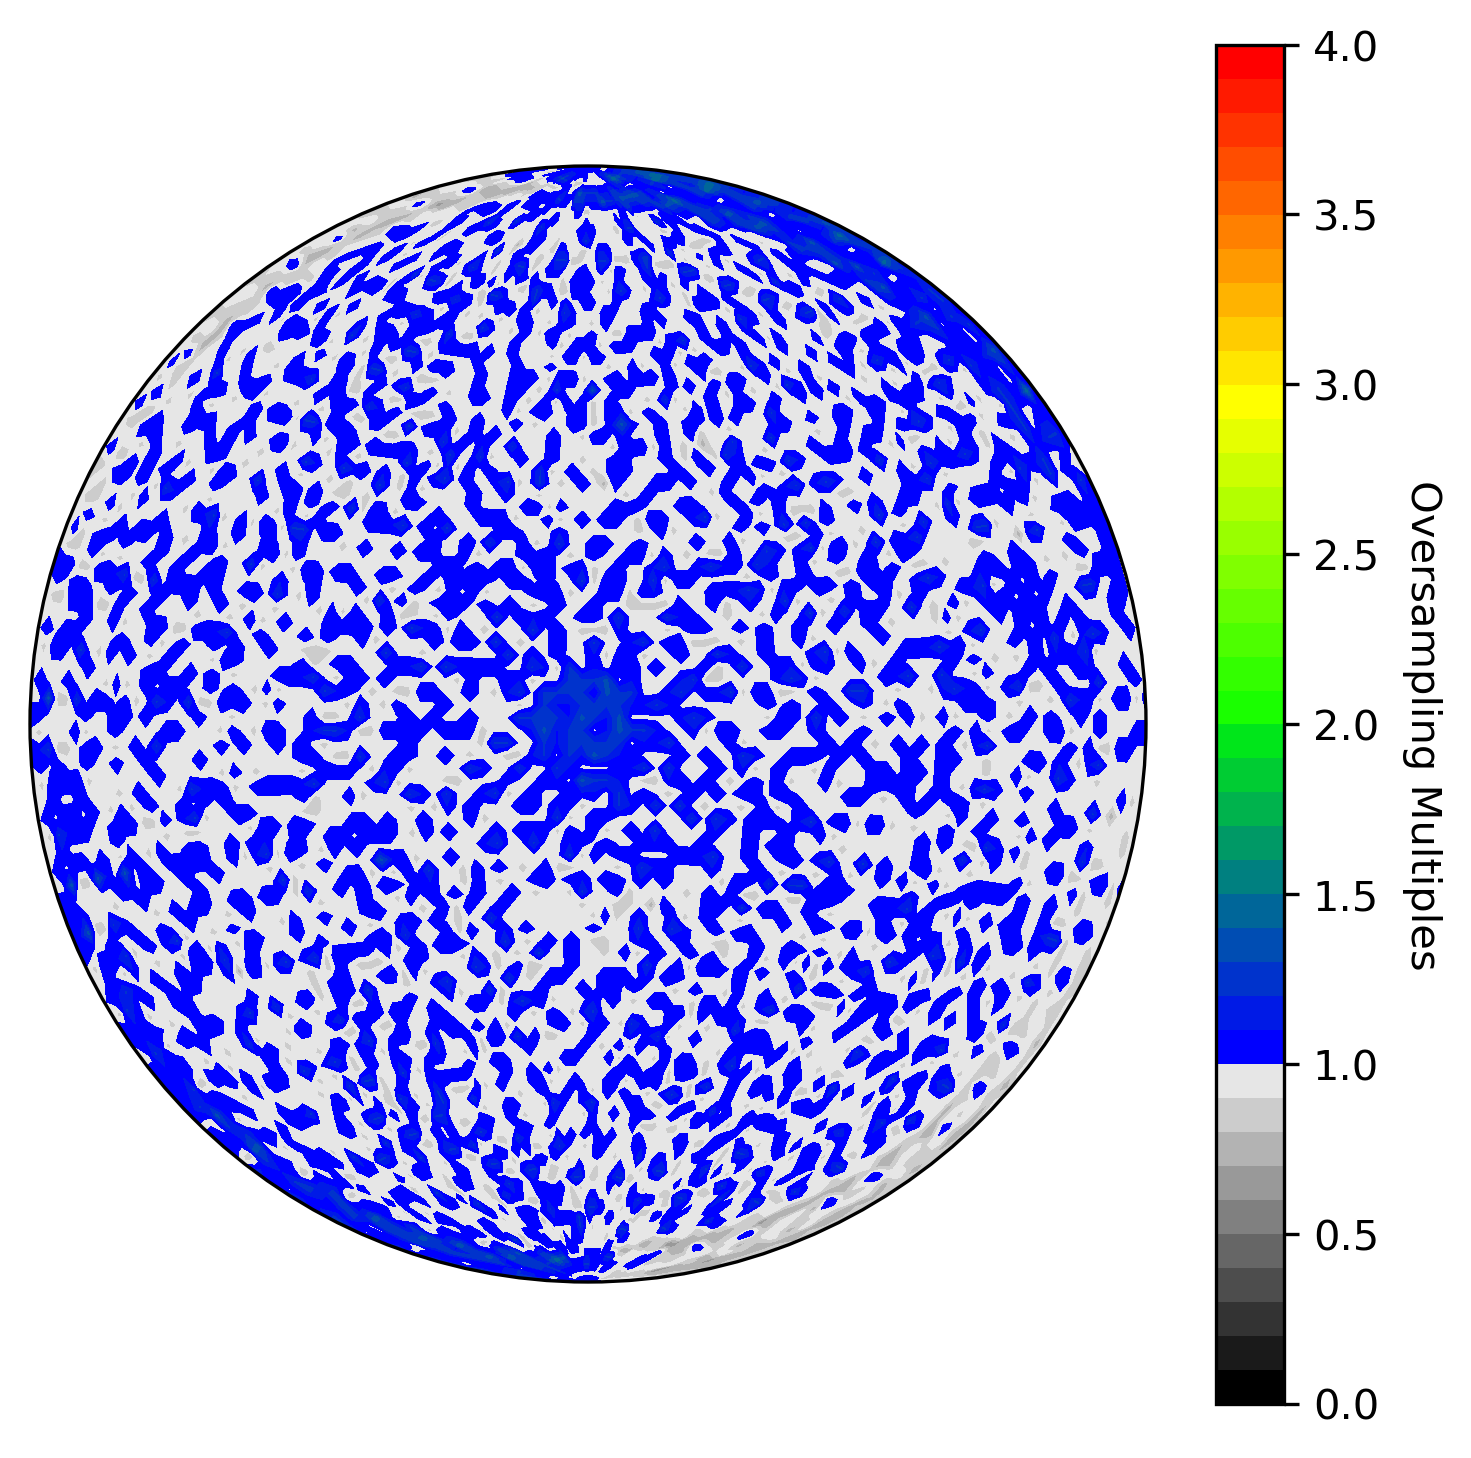

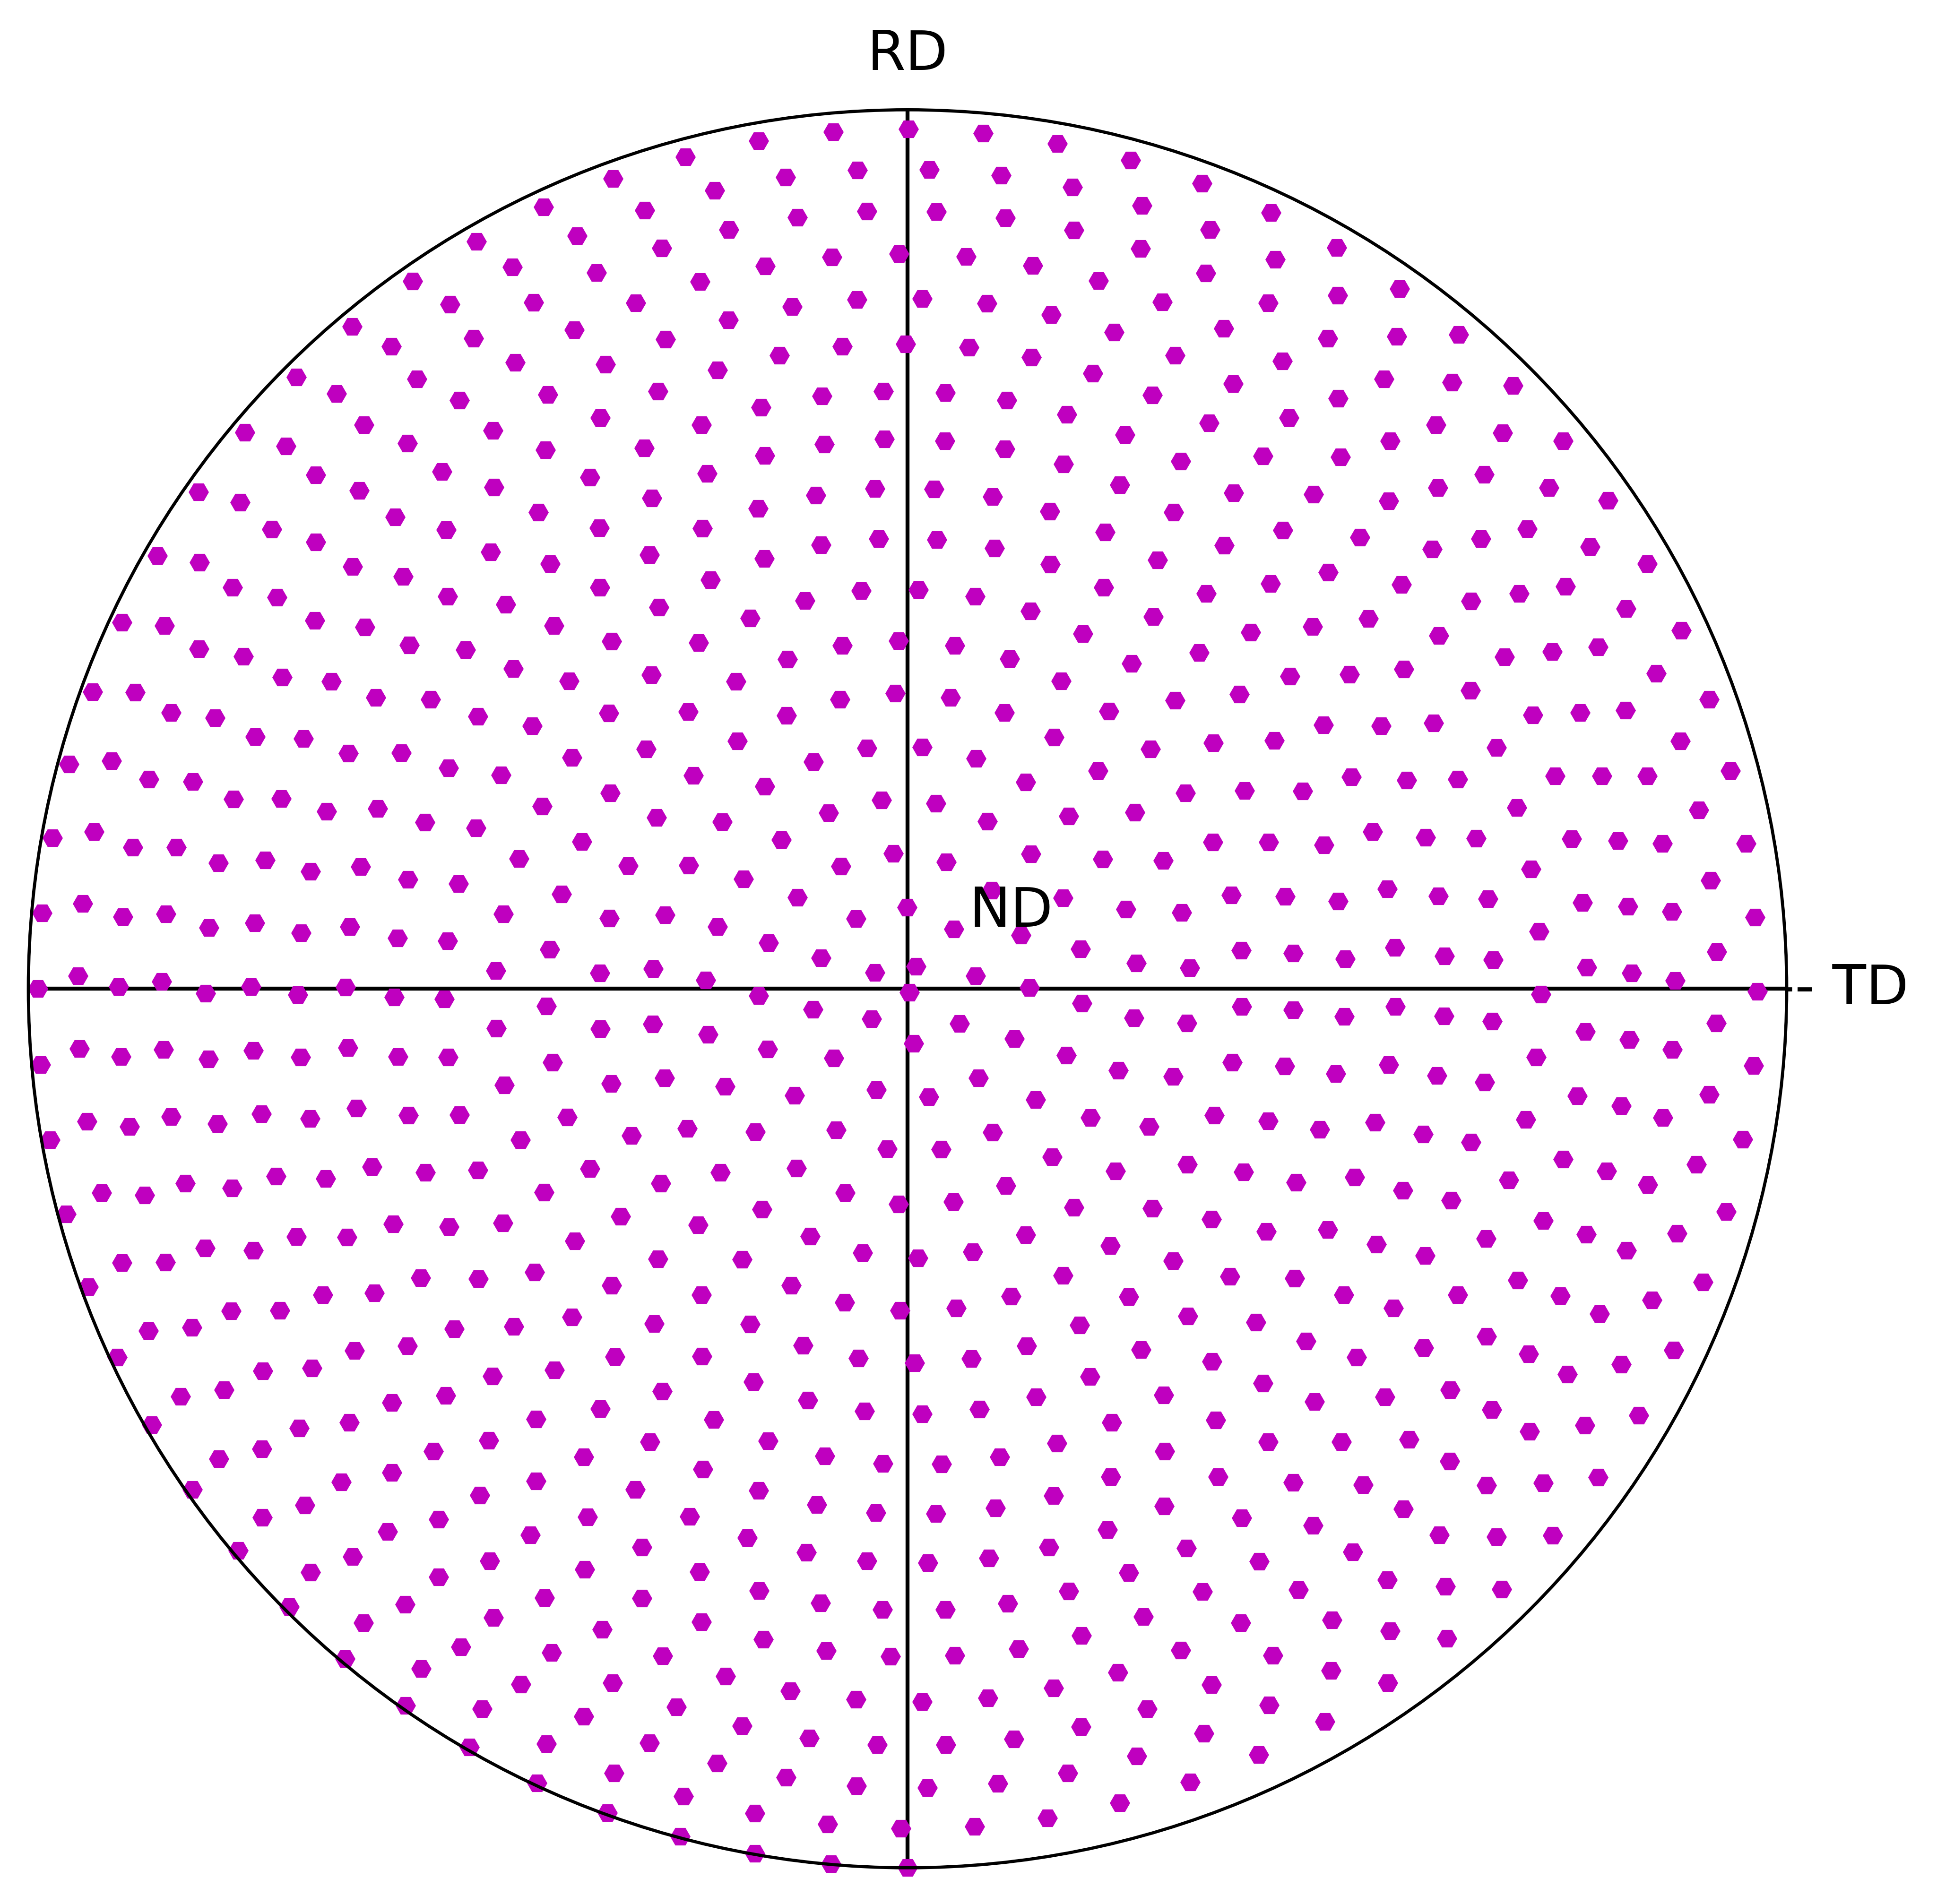

In [13]:
# Cr radiation: (211) Ferrite 2-theta=155.6, theta=77.8;  (220) Austenite 2-theta=128.4, theta=64.2
'''
SchemeName,Coordinates=TextureSampling.SingleOrientation("RD Single", 90.0,0.0)
PlotTexture.DensityContourPlot(SchemeName, Coordinates,save=True, savename=str(SchemeName)+'_contour.png')
#PlotTexture.SingleSchemePlot(SchemeName,Coordinates,'mH',4.0, save=True, cmd=True, savename='RDSingle_scatter.png')


SchemeName,Coordinates=TextureSampling.SingleOrientation("ND Single", 0.0,0.0)
PlotTexture.DensityContourPlot(SchemeName, Coordinates,save=True, savename=str(SchemeName)+'_contour.png')
#PlotTexture.SingleSchemePlot(SchemeName,Coordinates,'mH',4.0, save=True, cmd=True, savename='NDSingle_scatter.png')


SchemeName,Coordinates=TextureSampling.SingleOrientation("TD Single", 90.0,90.0)
PlotTexture.DensityContourPlot(SchemeName, Coordinates,save=True, savename=str(SchemeName)+'_contour.png')
#PlotTexture.SingleSchemePlot(SchemeName,Coordinates,'mH',4.0, save=True, cmd=True, savename='TDSingle_scatter.png')

SchemeName,Coordinates=TextureSampling.SingleOrientation("Morris Single", 60.0,90.0)
PlotTexture.DensityContourPlot(SchemeName, Coordinates,save=True, savename=str(SchemeName)+'_contour.png')
#PlotTexture.SingleSchemePlot(SchemeName,Coordinates,'mH',4.0, save=True, cmd=True, savename='Morris_scatter.png')



SchemeName,Coordinates=TextureSampling.EqualAngleGrid('EA', 90.0, 5.0)
PlotTexture.DensityContourPlot(SchemeName, Coordinates,save=True, savename=str(SchemeName)+'_contour.png')
PlotTexture.SingleSchemePlot(SchemeName,Coordinates,'mH',4.0, save=True, cmd=True, savename=str(SchemeName)+'_scatter.png')


SchemeName,Coordinates=TextureSampling.TiltRotate("NoRotation-tilt60deg", 120.0, 1600.0, 0.0,60.0,56.0)
PlotTexture.DensityContourPlot(SchemeName, Coordinates,save=True, savename=str(SchemeName)+'_contour.png')
PlotTexture.SingleSchemePlot(SchemeName,Coordinates,'mH',4.0, save=True, cmd=True, savename=str(SchemeName)+'_scatter.png')


SchemeName, Coordinates=TextureSampling.SpiralScheme('Rizzie', 90.0, 6480)
PlotTexture.DensityContourPlot(SchemeName, Coordinates,save=True, savename=str(SchemeName)+'_contour.png')
PlotTexture.SingleSchemePlot(SchemeName,Coordinates,'mH',4.0, save=True, cmd=True, savename=str(SchemeName)+'_scatter.png')


SchemeName, Coordinates= TextureSampling.GaussQuad('Gauss')
PlotTexture.DensityContourPlot(SchemeName, Coordinates,save=True, savename=str(SchemeName)+'_contour.png')
PlotTexture.SingleSchemePlot(SchemeName,Coordinates,'mH',4.0, save=True, cmd=True, savename=str(SchemeName)+'_scatter.png')


SchemeName, Coordinates= TextureSampling.BT8_HexGrid('thomas', 90.0, 5.0)
PlotTexture.DensityContourPlot(SchemeName, Coordinates,save=True, savename=str(SchemeName)+'_contour.png')
PlotTexture.SingleSchemePlot(SchemeName,Coordinates,'mH',4.0, save=True, cmd=True, savename=str(SchemeName)+'_scatter.png')


#PlotTexture.SingleSchemePlot(SchemeName,Coordinates,'mH',4.0, save=True, cmd=True, savename='ring_scatter.png')

SchemeName,Coordinates=TextureSampling.TiltRotate("Rotation-NoTilt", 120.0, 1600.0, 30.0,0.0,56.0)
PlotTexture.DensityContourPlot(SchemeName, Coordinates,save=True, savename=str(SchemeName)+'_contour.png')
PlotTexture.SingleSchemePlot(SchemeName,Coordinates,'mH',4.0, save=True, cmd=True, savename=str(SchemeName)+'_scatter.png')


SchemeName, Coordinates= TextureSampling.SpiralGrid('Spiral', 5.0)
PlotTexture.DensityContourPlot(SchemeName, Coordinates,save=True, savename=str(SchemeName)+'_contour.png')
PlotTexture.SingleSchemePlot(SchemeName,Coordinates,'mH',4.0, save=True, cmd=True, savename=str(SchemeName)+'_scatter.png')


SchemeName, Coordinates=TextureSampling.KlugAlexanderSpiral('Holden', mirror=True, quadlock=False)
PlotTexture.SingleSchemePlot(SchemeName, Coordinates, 'mH', 4.0, save=True, savename='holden_scatter.png')
PlotTexture.DensityContourPlot(SchemeName, Coordinates,save=True, savename=str(SchemeName)+'_contour.png')

SchemeName, Coordinates=TextureSampling.HexGrid('Rizzie Hex',90.0, 5.0)
PlotTexture.DensityContourPlot(SchemeName, Coordinates,save=True, savename=str(SchemeName)+'_contour.png')
PlotTexture.SingleSchemePlot(SchemeName,Coordinates,'mH',4.0, save=True, cmd=True, savename=str(SchemeName)+'_scatter.png')


SchemeName, Coordinates=TextureSampling.HexGrid('Partial hex',60.0, 5.0)
PlotTexture.DensityContourPlot(SchemeName, Coordinates,save=True, savename=str(SchemeName)+'_contour.png')
PlotTexture.SingleSchemePlot(SchemeName,Coordinates,'mH',4.0, save=True, cmd=True, savename=str(SchemeName)+'_scatter.png')


SchemeName, Coordinates= TextureSampling.CLRGrid('clr', 90.0, 5.0)
PlotTexture.DensityContourPlot(SchemeName, Coordinates,save=True, savename=str(SchemeName)+'_contour.png')
PlotTexture.SingleSchemePlot(SchemeName,Coordinates,'mH',4.0, save=True, cmd=True, savename=str(SchemeName)+'_scatter.png')


SchemeName,Coordinates=TextureSampling.RingRot(5.0,2.84623415, np.arange(-60, 61, 5 ),'Y')
PlotTexture.DensityContourPlot(SchemeName, Coordinates,save=True, savename=str(SchemeName)+'_contour.png')
PlotTexture.SingleSchemePlot(SchemeName,Coordinates,'mH',4.0, save=True, cmd=True, savename=str(SchemeName)+'_scatter.png')

SchemeName,Coordinates=TextureSampling.RingRot(5.0,2.84623415, np.arange(-90, 91, 5 ),'Y')
PlotTexture.DensityContourPlot(SchemeName, Coordinates,save=True, savename=str(SchemeName)+'_contour.png')
PlotTexture.SingleSchemePlot(SchemeName,Coordinates,'mH',4.0, save=True, cmd=True, savename=str(SchemeName)+'_scatter.png')

SchemeName,Coordinates=TextureSampling.TiltRotate("Rotation-60detTilt", 120.0, 5000.0, 30.0,60.0,56.0)
PlotTexture.DensityContourPlot(SchemeName, Coordinates,save=True, savename=str(SchemeName)+'_contour.png')
PlotTexture.SingleSchemePlot(SchemeName,Coordinates,'mH',4.0, save=True, cmd=True, savename=str(SchemeName)+'_scatter.png')



SchemeName,Coordinates=TextureSampling.RingPerpND(5.0)
PlotTexture.DensityContourPlot(SchemeName, Coordinates,save=True, savename=str(SchemeName)+'_contour.png')
PlotTexture.SingleSchemePlot(SchemeName,Coordinates,'mH',4.0, save=True, cmd=True, savename=str(SchemeName)+'_scatter.png')

SchemeName,Coordinates=TextureSampling.RingPerpTD(5.0)
PlotTexture.DensityContourPlot(SchemeName, Coordinates,save=True, savename=str(SchemeName)+'_contour.png')
PlotTexture.SingleSchemePlot(SchemeName,Coordinates,'mH',4.0, save=True, cmd=True, savename=str(SchemeName)+'_scatter.png')


SchemeName, Coordinates=TextureSampling.RingPerpRD(5.0)
PlotTexture.DensityContourPlot(SchemeName, Coordinates,save=True, savename=str(SchemeName)+'_contour.png')
PlotTexture.SingleSchemePlot(SchemeName,Coordinates,'mH',4.0, save=True, cmd=True, savename=str(SchemeName)+'_scatter.png')


SchemeName, Coordinates= TextureSampling.OffsetRing("OffsetA45", 5.0, 64.2,35,315)
PlotTexture.SingleSchemePlot(SchemeName,Coordinates,'kp',5, save=True, savename=str(SchemeName)+'_scatter.png')
PlotTexture.DensityContourPlot(SchemeName, Coordinates,save=True, savename=str(SchemeName)+'_contour.png')


SchemeName, Coordinates= TextureSampling.OffsetRing("OffsetF45", 5.0, 77.8,35,315)
PlotTexture.SingleSchemePlot(SchemeName,Coordinates,'kp',5, save=True, savename=str(SchemeName)+'_scatter.png')
PlotTexture.DensityContourPlot(SchemeName, Coordinates,save=True, savename=str(SchemeName)+'_contour.png')

SchemeName, Coordinates= TextureSampling.OffsetRing("OffsetATD", 5.0, 64.2,35,270)
PlotTexture.SingleSchemePlot(SchemeName,Coordinates,'kp',5, save=True, savename=str(SchemeName)+'_scatter.png')
PlotTexture.DensityContourPlot(SchemeName, Coordinates,save=True, savename=str(SchemeName)+'_contour.png')


SchemeName, Coordinates= TextureSampling.OffsetRing("OffsetFTD", 5.0, 77.8,35,270)
PlotTexture.SingleSchemePlot(SchemeName,Coordinates,'kp',5, save=True, savename=str(SchemeName)+'_scatter.png')
PlotTexture.DensityContourPlot(SchemeName, Coordinates,save=True, savename=str(SchemeName)+'_contour.png')

'''
SchemeName, Coordinates= TextureSampling.SpiralGrid('Spiral', 5.0)
PlotTexture.DensityContourPlot(SchemeName, Coordinates,save=True, savename=str(SchemeName)+'_contour.png')
PlotTexture.SingleSchemePlot(SchemeName,Coordinates,'mH',4.0, save=True, cmd=True, savename=str(SchemeName)+'_scatter.png')




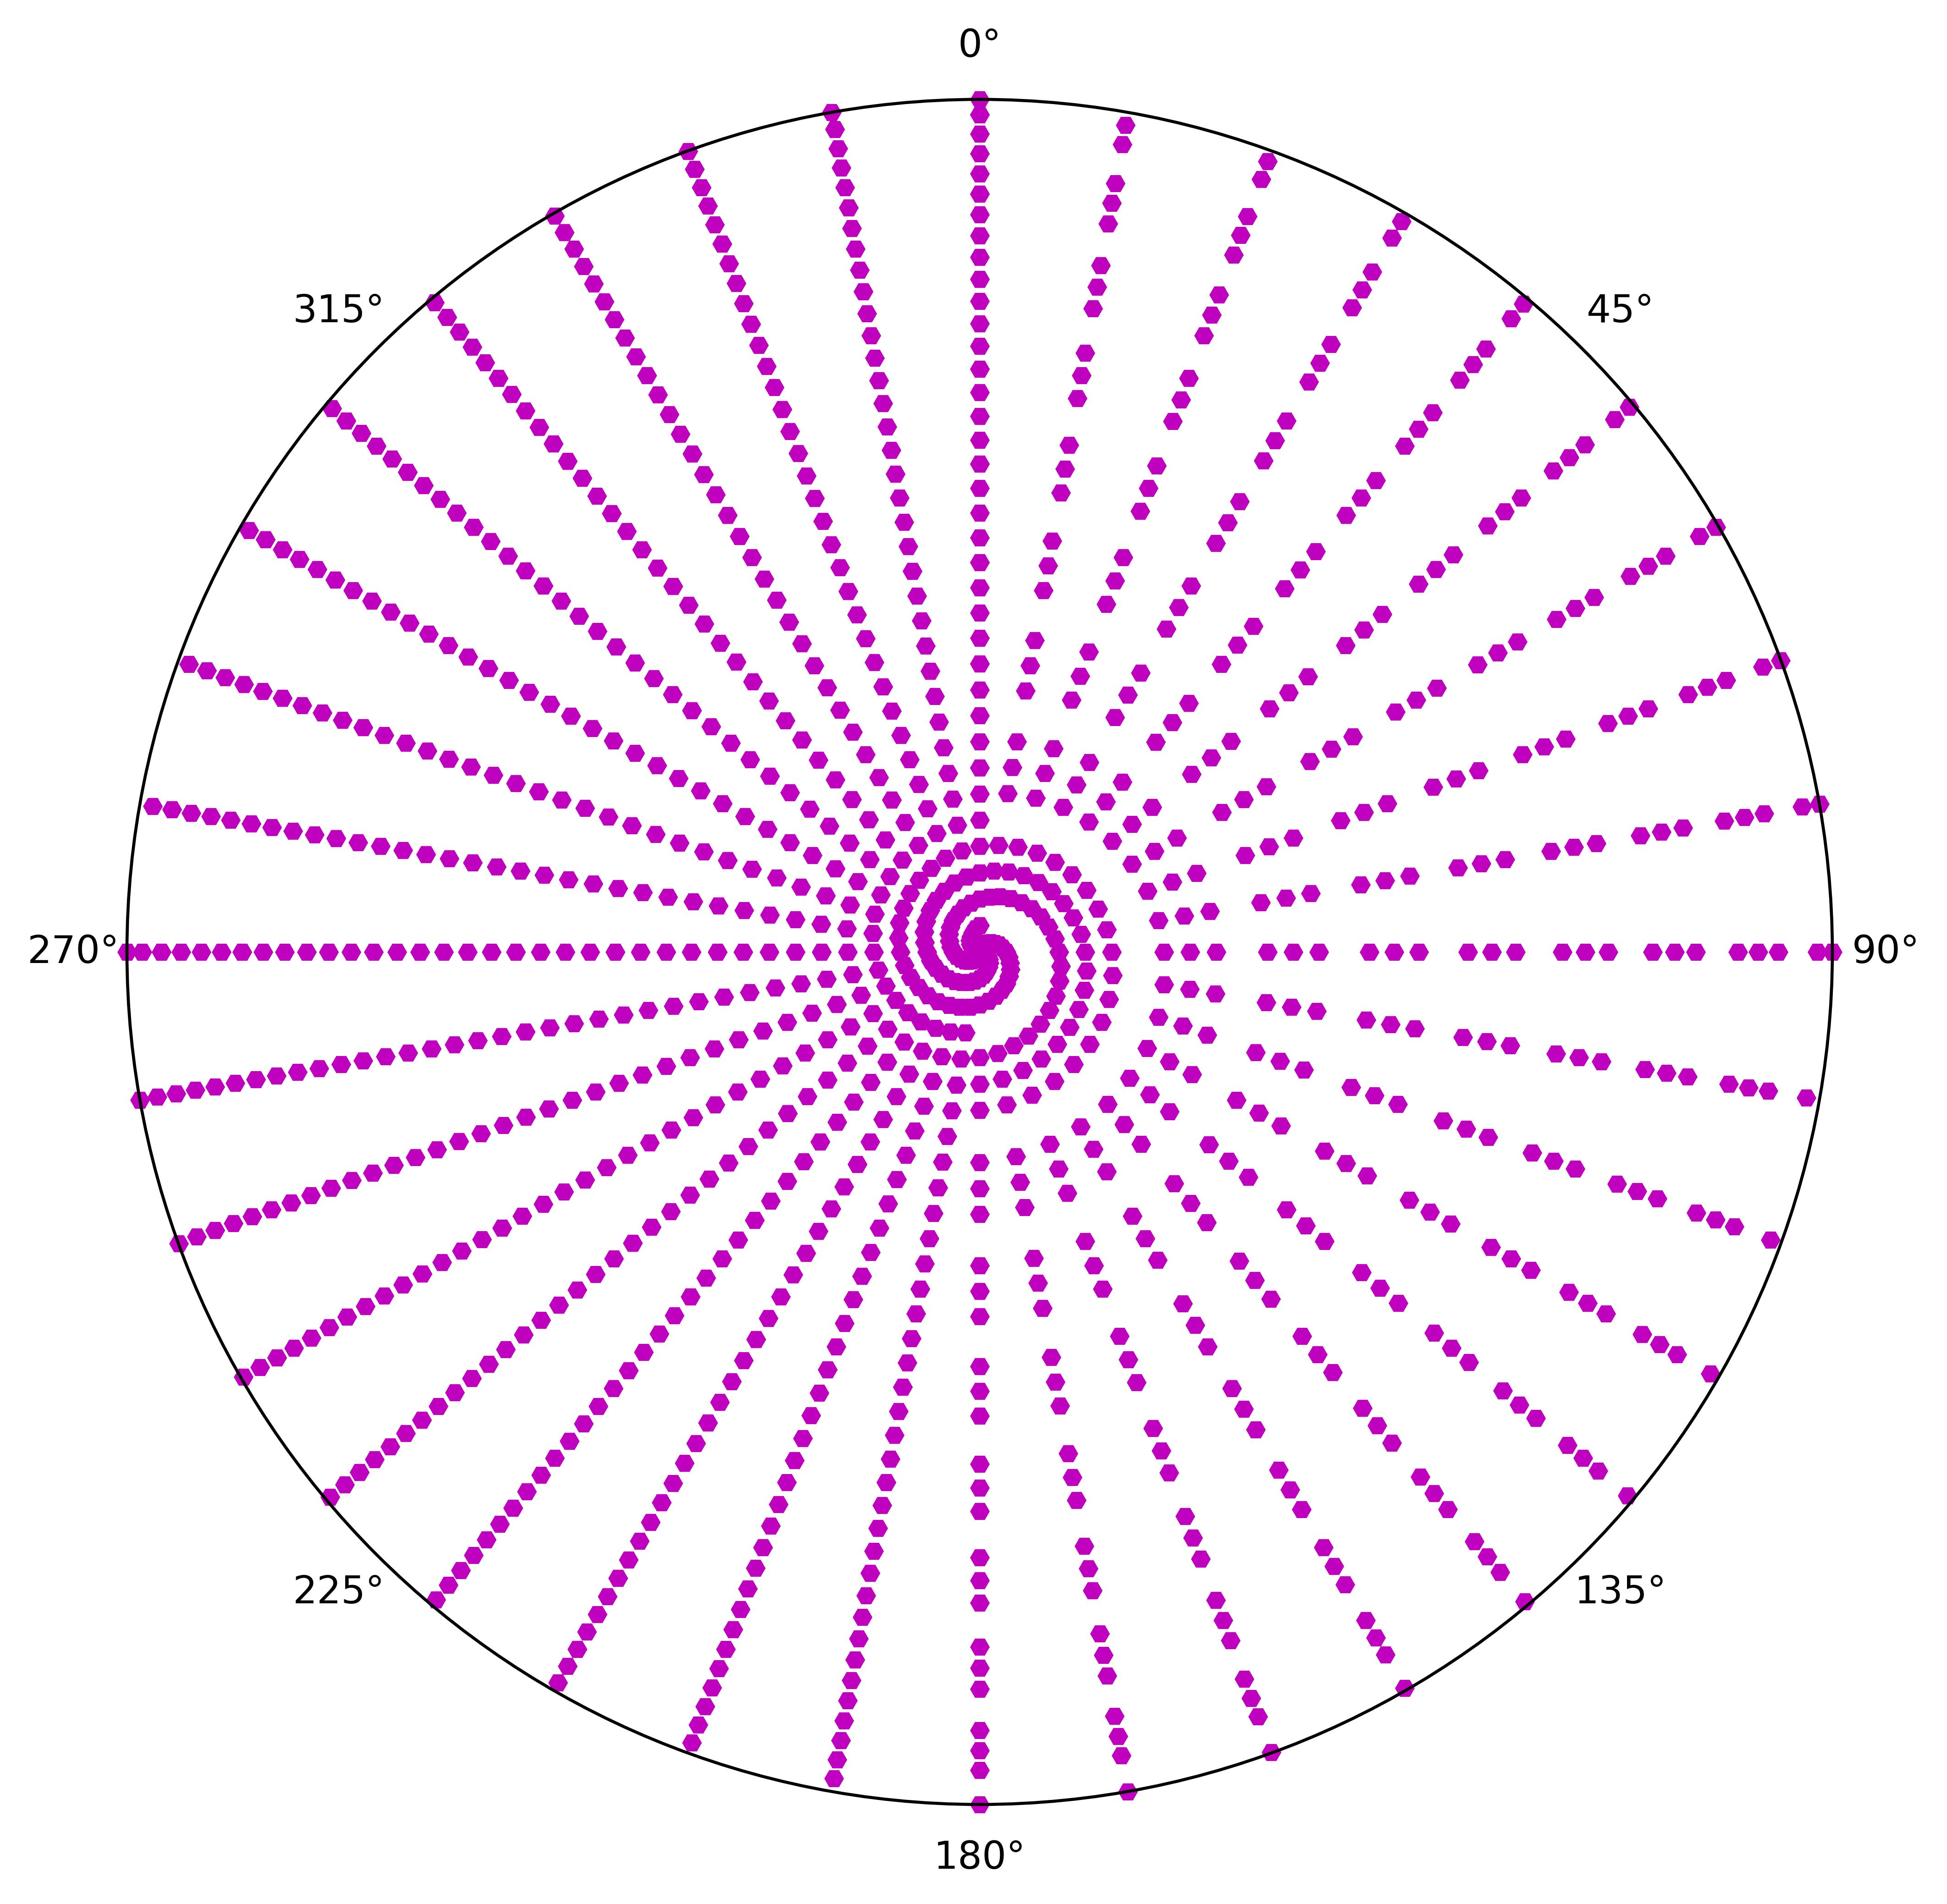

In [26]:
# Test plots moved from other notebooks

# Plot ODF key
# PlotTexture.ODFKey()

# Plot heatmap from Average Intensities
# PlotTexture.PlotHeatmap(IntensitesPath,20,"df2","HexGrid-60degTilt22p5degRes",[0.0,0.5])

# Plot different schemes on pole figures
#should I define the legend conventions somewhere else to reuse?
#SchemeName,Coordinates=TextureSampling.SingleOrientation("ND Single", 0.0,0.0)
#SchemeName,Coordinates=TextureSampling.HexGrid("HexGrid-90degTilt5degRes",60.0,21.0)
#PlotTexture.SingleSchemePlot(SchemeName,Coordinates,'bD',10)

# With additional options
#SchemeName,Coordinates=TextureSampling.HexGrid("HexGrid-90degTilt5degRes",
#                                              90.0,5, CoverageType="full", IncludeND=False)
#PlotTexture.DensityContourPlot(SchemeName, Coordinates)
#print(Coordinates)
#PlotTexture.SingleSchemePlot(SchemeName,Coordinates,'bD',10)

#SchemeName, Coordinates=TextureSampling.EqualAngleGrid('Equal Angle', 90.0, 5.0)
#SchemeName, Coordinates=TextureSampling.CLRGrid('CLR', 90.0, 10.0, CoverageType='full')
#SchemeName, Coordinates=TextureSampling.BT8_HexGrid("BT8",90.0, 5.0, CoverageType="full")
#SchemeName, Coordinates= TextureSampling.SpiralScheme("Spiral", 90.0, 6480)
SchemeName, Coordinates= TextureSampling.KlugAlexanderSpiral('Spiral', mirror=True, quadlock=True)
PlotTexture.SingleSchemePlot(SchemeName,Coordinates, 'mH', 4)
#PlotTexture.DensityContourPlot(SchemeName, Coordinates, save=True, cmd=True, savename='Spiral_contour.png')

#SchemeName, Coordinates=TextureSampling.EqualAngleGrid('Equal Angle', 90.0, 5.0)
#PlotTexture.SingleSchemePlot(SchemeName,Coordinates,'mH',4, save=True, cmd=True, savename='EA_scatter.png')
#PlotTexture.DensityContourPlot(SchemeName, Coordinates, save=True, cmd=True, savename='EA_contour.png')

#SchemeName, Coordinates=TextureSampling.CLRGrid('CLR', 90.0, 5.0)
#PlotTexture.SingleSchemePlot(SchemeName,Coordinates,'mH',4, save=True, cmd=True, savename='CLR_scatter.png')
#PlotTexture.DensityContourPlot(SchemeName, Coordinates, save=True, cmd=True, savename='CLR_contour.png')

#SchemeName, Coordinates=TextureSampling.BT8_HexGrid("BT8",90.0, 5.0)
#PlotTexture.SingleSchemePlot(SchemeName,Coordinates,'mH',4, save=True, cmd=True, savename='BT8_scatter.png')
#PlotTexture.DensityContourPlot(SchemeName, Coordinates, save=True, cmd=True, savename='BT8_contour.png')




#SchemeName,Coordinates=TextureSampling.RingRot(5.0,2.5, np.arange(-90, 91, 5 ),'X')
#PlotTexture.SingleSchemePlot(SchemeName,Coordinates,'yo',2)
#PlotTexture.DensityContourPlot(SchemeName, Coordinates)
#PlotTexture.DensityContourPlot(SchemeName, Coordinates, Weights=True)
#PlotTexture.PlotHeatmap(10,"3Pairs-C","RotRing Axis-Y Res-5.0 Theta-2.5 ",IntensitesPath, cbarRange=[0.2,0.3])

In [ ]:
Coordinates.to_csv("Coords.csv")

In [ ]:
SchemeName,Coordinates=TextureSampling.SingleOrientation("ND Single", 2.5,0)
PlotTexture.SingleSchemePlot(SchemeName,Coordinates,'ko',4)

## Create a dataframe of different Schemes, Coordinates, plot commands

In [10]:
column_names = ["SchemeName", "Coordinates", "MarkerType", "MarkerSize"]
SchemeDF = pd.DataFrame(columns = column_names)

#Used for BASIS SRP Interim reports
#SchemeName,Coordinates=TextureSampling.EqualAngleGrid("Equal Angle", 90.0, 5.0, 'full')
#SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'nS',10]], 
                                      #columns = column_names),ignore_index=True)

#SchemeName,Coordinates=TextureSampling.EqualAngleGrid("Equal Angle-60", 60.0, 5.0, 'full')
#SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'nS',10]], 
#                                      columns = column_names),ignore_index=True)
                            
#SchemeName,Coordinates=TextureSampling.EqualAngleGrid("Equal Angle-Quad60", 60.0, 5.0, 'quad')
#SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'nS',10]], 
#                                      columns = column_names),ignore_index=True)

#SchemeName,Coordinates=TextureSampling.EqualAngleGrid("Equal Angle-Quad", 90.0, 5.0, 'quad')
#SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'nS',10]], 
#                                      columns = column_names),ignore_index=True)

#SchemeName, Coordinates=TextureSampling.CLRGrid('CLR', 90.0, 5.0, CoverageType='full')
#SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName,Coordinates,'nS',10]],columns=column_names),ignore_index=True)

#SchemeName, Coordinates=TextureSampling.CLRGrid('CLR-60', 60.0, 5.0, CoverageType='full')
#SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName,Coordinates,'nS',10]],columns=column_names),ignore_index=True)

#SchemeName, Coordinates=TextureSampling.CLRGrid('CLR-Quad', 90.0, 5.0, CoverageType='quad')
#SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName,Coordinates,'nS',10]],columns=column_names),ignore_index=True)

#SchemeName, Coordinates=TextureSampling.CLRGrid('CLR-Quad60', 60.0, 5.0, CoverageType='quad')
#SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName,Coordinates,'nS',10]],columns=column_names),ignore_index=True)

SchemeName,Coordinates=TextureSampling.BT8_HexGrid("BT8Hex_2.5", 90.0, 2.5)
SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'mh',4]], columns = column_names),ignore_index=True)

SchemeName,Coordinates=TextureSampling.BT8_HexGrid("BT8Hex_5", 90.0, 5.0)
SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'mh',4]], columns = column_names),ignore_index=True)

SchemeName,Coordinates=TextureSampling.BT8_HexGrid("BT8Hex_10", 90.0, 10.0)
SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'mh',4]], columns = column_names),ignore_index=True)

SchemeName,Coordinates=TextureSampling.BT8_HexGrid("BT8Hex_15", 90.0, 15.0)
SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'mh',4]], columns = column_names),ignore_index=True)

#SchemeName,Coordinates=TextureSampling.BT8_HexGrid("BT8Hex-60", 60.0, 5.0)
#SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'mh',4]], columns = column_names),ignore_index=True)


#SchemeName,Coordinates=TextureSampling.BT8_HexGrid("BT8Hex-Quad", 90.0, 5.0, CoverageType='quad')
#SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'mh',4]], columns = column_names),ignore_index=True)


#SchemeName,Coordinates=TextureSampling.BT8_HexGrid("BT8Hex-Quad60", 60.0, 5.0, CoverageType='quad')
#SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'mh',4]], columns = column_names),ignore_index=True)

SchemeName, Coordinates= TextureSampling.SpiralGrid("Spiral2.5", 2.5)
SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName,Coordinates, 'mh', 4]], columns=column_names), ignore_index=True)

SchemeName, Coordinates= TextureSampling.SpiralGrid("Spiral5", 5.0)
SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName,Coordinates, 'mh', 4]], columns=column_names), ignore_index=True)

SchemeName, Coordinates= TextureSampling.SpiralGrid("Spiral7.5", 7.5)
SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName,Coordinates, 'mh', 4]], columns=column_names), ignore_index=True)

SchemeName, Coordinates= TextureSampling.SpiralGrid("Spiral10", 10.0)
SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName,Coordinates, 'mh', 4]], columns=column_names), ignore_index=True)

SchemeName, Coordinates= TextureSampling.SpiralGrid("Spiral15", 15.0)
SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName,Coordinates, 'mh', 4]], columns=column_names), ignore_index=True)




SchemeName, Coordinates= TextureSampling.OffsetRing("OffsetF45", 5.0, 77.8,35,315)
SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName,Coordinates, 'mh', 4]], columns=column_names), ignore_index=True)

SchemeName, Coordinates= TextureSampling.OffsetRing("OffsetA45", 5.0, 64.2,35,315)
SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName,Coordinates, 'mh', 4]], columns=column_names), ignore_index=True)


SchemeName, Coordinates= TextureSampling.OffsetRing("OffsetFTD", 5.0, 77.8,35,270)
SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName,Coordinates, 'mh', 4]], columns=column_names), ignore_index=True)

SchemeName, Coordinates= TextureSampling.OffsetRing("OffsetATD", 5.0, 64.2,35,270)
SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName,Coordinates, 'mh', 4]], columns=column_names), ignore_index=True)




# Single Orientations
#SchemeName,Coordinates=TextureSampling.SingleOrientation("ND Single", 0.0,0.0)
#SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'bS',10]], 
#                                      columns = column_names),ignore_index=True)
#SchemeName,Coordinates=TextureSampling.SingleOrientation("RD Single", 90.0,0.0)
#SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'rS',10]], 
                                      #columns = column_names),ignore_index=True)
#SchemeName,Coordinates=TextureSampling.SingleOrientation("TD Single", 90.0,90.0)
#SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'gS',10]], 
                                      #columns = column_names),ignore_index=True)
#SchemeName,Coordinates=TextureSampling.SingleOrientation("Morris Single", 60.0,90.0)
#SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'yS',10]], 
#                                      columns = column_names),ignore_index=True)
                    
## Ring Schemes

#SchemeName,Coordinates=TextureSampling.RingPerpND(5.0)
#SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'b+',10]], 
#                                      columns = column_names),ignore_index=True)
#SchemeName,Coordinates=TextureSampling.RingPerpRD(5.0)
#SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'r+',10]], 
#                                      columns = column_names),ignore_index=True)
#SchemeName,Coordinates=TextureSampling.RingPerpTD(5.0)
#SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'g+',10]], 
#                                      columns = column_names),ignore_index=True)

# Tilt and Rotate Schemes
#SchemeName,Coordinates=TextureSampling.TiltRotate("NoRotation-tilt60deg", 120.0, 1600.0, 0.0,60.0,56.0)
#SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'cd',4]], 
#                                      columns = column_names),ignore_index=True)
#SchemeName,Coordinates=TextureSampling.TiltRotate("Rotation-NoTilt", 120.0, 1600.0, 30.0,0.0,56.0)
#SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'cd',4]], 
#                                      columns = column_names),ignore_index=True)
#SchemeName,Coordinates=TextureSampling.TiltRotate("Rotation-60detTilt", 120.0, 5000.0, 30.0,60.0,56.0)
#SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'cd',4]], 
#                                      columns = column_names),ignore_index=True)
        
# Hex Grid Schemes      
SchemeName,Coordinates=TextureSampling.HexGrid("HexGrid-90degTilt2.5degRes",90.0,2.5)
SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'mh',4]], 
                                      columns = column_names),ignore_index=True)

SchemeName,Coordinates=TextureSampling.HexGrid("HexGrid-90degTilt5degRes",90.0,5.0)
SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'mh',4]], 
                                      columns = column_names),ignore_index=True)

SchemeName,Coordinates=TextureSampling.HexGrid("HexGrid-90degTilt10degRes",90.0,10.0)
SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'mh',4]], 
                                      columns = column_names),ignore_index=True)

SchemeName,Coordinates=TextureSampling.HexGrid("HexGrid-90degTilt15degRes",90.0,15.0)
SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'mh',4]], 
                                      columns = column_names),ignore_index=True)


#SchemeName,Coordinates=TextureSampling.HexGrid("HexGrid-90degTilt22p5degRes",60.0,5.0)
#SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'mh',4]], 
#                                      columns = column_names),ignore_index=True)
#SchemeName,Coordinates=TextureSampling.HexGrid("HexGrid-60degTilt5degRes",60.0,22.5)
#SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'mh',4]], 
#                                      columns = column_names),ignore_index=True)

# Used in DXC and Mines Fall 2020 Report
## Cube Corner
# SchemeName,Coordinates=TextureSampling.HexGrid("HexGrid-CC-5degRes",
#                                                90.0,5, CoverageType="quad", IncludeND=False)
# SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'mh',4]], 
#                                       columns = column_names),ignore_index=True)

# SchemeName,Coordinates=TextureSampling.HexGrid("HexGrid-CC-15degRes",
#                                                90.0,15, CoverageType="quad", IncludeND=False)
# SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'mh',4]], 
#                                       columns = column_names),ignore_index=True)

# SchemeName,Coordinates=TextureSampling.HexGrid("HexGrid-CC-22p5degRes",
#                                                90.0,22.5, CoverageType="quad", IncludeND=False)
# SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'mh',4]], 
#                                       columns = column_names),ignore_index=True)

# SchemeName,Coordinates=TextureSampling.HexGrid("HexGrid-CC-30degRes",
#                                                90.0,30, CoverageType="quad", IncludeND=False)
# SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'mh',4]], 
#                                       columns = column_names),ignore_index=True)
# ## Sheet Normal
# SchemeName,Coordinates=TextureSampling.HexGrid("HexGrid-SN-5degRes",
#                                                60.0,5, CoverageType="quad", IncludeND=False)
# SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'mh',4]], 
#                                       columns = column_names),ignore_index=True)

# SchemeName,Coordinates=TextureSampling.HexGrid("HexGrid-SN-15degRes",
#                                                60.0,15, CoverageType="quad", IncludeND=False)
# SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'mh',4]], 
#                                       columns = column_names),ignore_index=True)

# SchemeName,Coordinates=TextureSampling.HexGrid("HexGrid-SN-22p5degRes",
#                                                60.0,22.5, CoverageType="quad", IncludeND=False)
# SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'mh',4]], 
#                                       columns = column_names),ignore_index=True)

# SchemeName,Coordinates=TextureSampling.HexGrid("HexGrid-SN-30degRes",
#                                                60.0,30, CoverageType="quad", IncludeND=False)
# SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'mh',4]], 
#                                       columns = column_names),ignore_index=True)

## Rotated Rings, using calculated theta angle
# Additional entries for partial rings
#Austenite 111
# SchemeName,Coordinates=TextureSampling.RingRot(5.0,2.84623415, np.arange(-90, 91, 5 ),'Y')
# SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'yo',4]], 
#                                       columns = column_names),ignore_index=True)

# SchemeName,Coordinates=TextureSampling.RingRot(5.0,2.84623415, np.arange(-90, 91, 5 ),'Y', Weight=True)
# SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'yo',4]], 
#                                       columns = column_names),ignore_index=True)

# SchemeName,Coordinates=TextureSampling.RingRot(5.0,2.84623415, np.arange(-60, 61, 5 ),'Y')
# SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'yo',4]], 
#                                       columns = column_names),ignore_index=True)

#SchemeName,Coordinates=TextureSampling.RingRot(5.0,2.84623415, np.arange(-30, 31, 5 ),'Y')
# SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'yo',4]], 
#                                       columns = column_names),ignore_index=True)

# #Austenite 200
# SchemeName,Coordinates=TextureSampling.RingRot(5.0,3.28699929, np.arange(-90, 91, 5 ),'Y')
# SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'yo',4]], 
#                                       columns = column_names),ignore_index=True)

# SchemeName,Coordinates=TextureSampling.RingRot(5.0,3.28699929, np.arange(-90, 91, 5 ),'Y', Weight=True)
# SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'yo',4]], 
#                                       columns = column_names),ignore_index=True)

# SchemeName,Coordinates=TextureSampling.RingRot(5.0,3.28699929, np.arange(-60, 61, 5 ),'Y')
# SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'yo',4]], 
#                                       columns = column_names),ignore_index=True)

# SchemeName,Coordinates=TextureSampling.RingRot(5.0,3.28699929, np.arange(-30, 31, 5 ),'Y')
# SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'yo',4]], 
#                                       columns = column_names),ignore_index=True)

# #Austenite 220
# SchemeName,Coordinates=TextureSampling.RingRot(5.0,4.65107599, np.arange(-90, 91, 5 ),'Y')
# SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'yo',4]], 
#                                       columns = column_names),ignore_index=True)

# SchemeName,Coordinates=TextureSampling.RingRot(5.0,4.65107599, np.arange(-90, 91, 5 ),'Y', Weight=True)
# SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'yo',4]], 
#                                       columns = column_names),ignore_index=True)

# SchemeName,Coordinates=TextureSampling.RingRot(5.0,4.65107599, np.arange(-60, 61, 5 ),'Y')
# SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'yo',4]], 
#                                       columns = column_names),ignore_index=True)

# SchemeName,Coordinates=TextureSampling.RingRot(5.0,4.65107599, np.arange(-30, 31, 5 ),'Y')
# SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'yo',4]], 
#                                       columns = column_names),ignore_index=True)
# #Martensite 110
# SchemeName,Coordinates=TextureSampling.RingRot(5.0,2.79042653, np.arange(-90, 91, 5 ),'Y')
# SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'yo',4]], 
#                                       columns = column_names),ignore_index=True)

# SchemeName,Coordinates=TextureSampling.RingRot(5.0,2.79042653, np.arange(-90, 91, 5 ),'Y', Weight=True)
# SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'yo',4]], 
#                                       columns = column_names),ignore_index=True)

# SchemeName,Coordinates=TextureSampling.RingRot(5.0,2.79042653, np.arange(-60, 61, 5 ),'Y')
# SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'yo',4]], 
#                                       columns = column_names),ignore_index=True)

# SchemeName,Coordinates=TextureSampling.RingRot(5.0,2.79042653, np.arange(-30, 31, 5 ),'Y')
# SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'yo',4]], 
#                                       columns = column_names),ignore_index=True)

# #Martensite 200
# SchemeName,Coordinates=TextureSampling.RingRot(5.0,3.94782221, np.arange(-90, 91, 5 ),'Y')
# SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'yo',4]], 
#                                       columns = column_names),ignore_index=True)

# SchemeName,Coordinates=TextureSampling.RingRot(5.0,3.94782221, np.arange(-90, 91, 5 ),'Y', Weight=True)
# SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'yo',4]], 
#                                       columns = column_names),ignore_index=True)

# SchemeName,Coordinates=TextureSampling.RingRot(5.0,3.94782221, np.arange(-60, 61, 5 ),'Y')
# SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'yo',4]], 
#                                       columns = column_names),ignore_index=True)

# SchemeName,Coordinates=TextureSampling.RingRot(5.0,3.94782221, np.arange(-30, 31, 5 ),'Y')
# SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'yo',4]], 
#                                       columns = column_names),ignore_index=True)
# #Martensite 220
# SchemeName,Coordinates=TextureSampling.RingRot(5.0,4.8369936, np.arange(-90, 91, 5 ),'Y')
# SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'yo',4]], 
#                                       columns = column_names),ignore_index=True)

# SchemeName,Coordinates=TextureSampling.RingRot(5.0,4.8369936, np.arange(-90, 91, 5 ),'Y', Weight=True)
# SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'yo',4]], 
#                                       columns = column_names),ignore_index=True)

# SchemeName,Coordinates=TextureSampling.RingRot(5.0,4.8369936, np.arange(-60, 61, 5 ),'Y')
# SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'yo',4]], 
#                                       columns = column_names),ignore_index=True)

# SchemeName,Coordinates=TextureSampling.RingRot(5.0,4.8369936, np.arange(-30, 31, 5 ),'Y')
# SchemeDF=SchemeDF.append(pd.DataFrame(data=[[SchemeName, Coordinates,'yo',4]], 
#                                       columns = column_names),ignore_index=True)


In [ ]:
#SchemeName,Coordinates=TextureSampling.RingRot(5.0,2.5, np.arange(-90, 91, 5 ),'Y', Weight=True)
#Coordinates.to_csv("Coords.csv")

In [ ]:
# When needed to after changes
reload(TextureSampling)
reload(PlotTexture)

In [ ]:
# Plot the weighted and unweighted data

SchemeName,Coordinates=TextureSampling.RingRot(5.0,2.5, np.arange(-90, 91, 5 ),'Y')
PlotTexture.SingleSchemePlot(SchemeName,Coordinates,'ko',2,RD=False, save=True, savename="Chess-2p5theta.png")
PlotTexture.DensityContourPlot(SchemeName, Coordinates, save=True, savename="Chess-2p5theta-contour.png")

SchemeName,Coordinates=TextureSampling.RingRot(5.0,5.0, np.arange(-90, 91, 5 ),'Y')
PlotTexture.SingleSchemePlot(SchemeName,Coordinates,'ko',2,RD=False, save=True, savename="Chess-5p0theta.png")
PlotTexture.DensityContourPlot(SchemeName, Coordinates, save=True, savename="Chess-5p0theta-contour.png")

SchemeName,Coordinates=TextureSampling.RingRot(5.0,2.5, np.arange(-60, 61, 5 ),'Y')
PlotTexture.SingleSchemePlot(SchemeName,Coordinates,'ko',2,RD=False, save=True, savename="Chess-2p5theta-omega60.png")
PlotTexture.DensityContourPlot(SchemeName, Coordinates, save=True, savename="Chess-2p5theta-omega60-contour.png")

SchemeName,Coordinates=TextureSampling.RingRot(5.0,2.5, np.arange(-30, 31, 5 ),'Y')
PlotTexture.SingleSchemePlot(SchemeName,Coordinates,'ko',2,RD=False, save=True, savename="Chess-2p5theta-omega30.png")
PlotTexture.DensityContourPlot(SchemeName, Coordinates, save=True, savename="Chess-2p5theta-omega30-contour.png")



# Still some issues with the weighting function for omega...

SchemeName,Coordinates=TextureSampling.RingRot(5.0,2.5, np.arange(-90, 91, 5 ),'Y', Weight=True)
PlotTexture.SingleSchemePlot(SchemeName,Coordinates,'ko',2,RD=False)
PlotTexture.DensityContourPlot(SchemeName, Coordinates, Weights=True, save=True,
                               savename="Chess-2p5theta-contour-weighted.png")

SchemeName,Coordinates=TextureSampling.RingRot(5.0,5.0, np.arange(-90, 91, 5 ),'Y', Weight=True)
PlotTexture.SingleSchemePlot(SchemeName,Coordinates,'ko',2,RD=False)
PlotTexture.DensityContourPlot(SchemeName, Coordinates, Weights=True, save=True,
                               savename="Chess-5p0theta-contour-weighted.png")

#Coordinates.to_csv("Coords.csv")

In [ ]:
sum(Coordinates['Weights'])

In [ ]:
weight_list=[]
weight=1
omega_list=np.arange(-90, 91, 5 )
for omega_counter, omega_step in enumerate(omega_list):
    if omega_step==90:
        print("High")
        weight_list.append(weight/2.0)
    elif omega_step==-90:
        print("Low")
        weight_list.append(weight/2.0)
    else:
        weight_list.append(weight)
    

In [6]:
# When needed to after changes
reload(TextureSampling)
reload(PlotTexture)

<module 'PlotTexture' from 'c:\\Users\\surya\\Downloads\\project\\Texture-Sampling-PhaseMeasurement-BiasErrors\\JupyterNotebooks\\PlotTexture.py'>

In [ ]:
#Fix directory if lost
os.chdir(os.path.join("/Users", 'creuzige', 'Documents', 'NIST_Research','GitHub',
                 'Texture-Sampling-PhaseMeasurement-BiasErrors','JupyterNotebooks'))

In [ ]:
## Test Generation of Average Intensities from dataframe
# Experimental data only
# Mtex data

# Get the current working directory path
cwd=os.getcwd()
Mtexdatapath=os.path.abspath(os.path.join(cwd, '..', 'Matlab', 'ChessData'))
IntensitesPath=os.path.abspath(os.path.join(cwd, 'AveragedIntensities-AMExp'))
TextureSampling.GenerateAveIntesity(SchemeDF,"mtex", Mtexdatapath, IntensitesPath)

In [11]:
## Test Generation of Average Intensities from dataframe
# Experimental data only
# Mtex data

# Get the current working directory path
cwd=os.getcwd()
Mtexdatapath=os.path.abspath(os.path.join(cwd, '..', 'Matlab', 'MtexDataHW-2021Jun08'))
IntensitesPath=os.path.abspath(os.path.join(cwd, 'AvgHW'))
TextureSampling.GenerateAveIntesity(SchemeDF,"mtex", Mtexdatapath, IntensitesPath)

t
You are now reading experimental pole figure(s): 
	UniformA-HW15_(511).txt
UniformA-HW15
File from listdir:  c:\Users\surya\Downloads\project\Texture-Sampling-PhaseMeasurement-BiasErrors\Matlab\MtexDataHW-2021Jun08\UniformA-HW15.maa
pftype:  mtex
UniformA-HW15
File from listdir:  c:\Users\surya\Downloads\project\Texture-Sampling-PhaseMeasurement-BiasErrors\Matlab\MtexDataHW-2021Jun08\UniformA-HW20
pftype:  mtex
Mtex data from:  UniformA-HW20
Pole Figure Parsing
You are now reading experimental pole figure(s): 
	UniformA-HW20_(111).txt
You are now reading experimental pole figure(s): 
	UniformA-HW20_(200).txt
You are now reading experimental pole figure(s): 
	UniformA-HW20_(220).txt
You are now reading experimental pole figure(s): 
	UniformA-HW20_(222).txt
You are now reading experimental pole figure(s): 
	UniformA-HW20_(311).txt
You are now reading experimental pole figure(s): 
	UniformA-HW20_(331).txt
You are now reading experimental pole figure(s): 
	UniformA-HW20_(333).txt
You are

In [ ]:
## Test Generation of Average Intensities from dataframe
# Experimental data only

# Get the current working directory path
cwd=os.getcwd()
xpcdatapath=os.path.abspath(os.path.join(cwd, '..', 'MAUD', 'XPCFiles-Exp'))
IntensitesPath=os.path.abspath(os.path.join(cwd, 'AveragedIntensities-Exp'))
TextureSampling.GenerateAveIntesity(SchemeDF, "xpc",xpcdatapath, IntensitesPath)

In [9]:
cwd=os.getcwd()
xpcdatapath=os.path.abspath(os.path.join(cwd, '..', 'MAUD', 'XPCFiles'))
IntensitesPath=os.path.abspath(os.path.join(cwd, 'AllAveragedIntensities'))
TextureSampling.GenerateAveIntesity(SchemeDF, "xpc",xpcdatapath, IntensitesPath)

 are now reading experimental pole figure(s): 
	c:\Users\surya\Downloads\project\Texture-Sampling-PhaseMeasurement-BiasErrors\MAUD\XPCFiles\O554F-HW25.xpc
There are 8 blocks of data found
number of pole figures: 8
O554F-HW25.xpc
File from listdir:  c:\Users\surya\Downloads\project\Texture-Sampling-PhaseMeasurement-BiasErrors\MAUD\XPCFiles\O554F-HW30.xpc
pftype:  xpc
Pole Figure Parsing
You are now reading experimental pole figure(s): 
	c:\Users\surya\Downloads\project\Texture-Sampling-PhaseMeasurement-BiasErrors\MAUD\XPCFiles\O554F-HW30.xpc
There are 8 blocks of data found
number of pole figures: 8
O554F-HW30.xpc
File from listdir:  c:\Users\surya\Downloads\project\Texture-Sampling-PhaseMeasurement-BiasErrors\MAUD\XPCFiles\O554F-HW35.xpc
pftype:  xpc
Pole Figure Parsing
You are now reading experimental pole figure(s): 
	c:\Users\surya\Downloads\project\Texture-Sampling-PhaseMeasurement-BiasErrors\MAUD\XPCFiles\O554F-HW35.xpc
There are 8 blocks of data found
number of pole figures: 8
O5

In [9]:
## Test Generation of Average Intensities from dataframe
# Simulated data only

# Get the current working directory path
cwd=os.getcwd()
xpcdatapath=os.path.abspath(os.path.join(cwd, '..', 'MAUD', 'XPCFiles-HW20'))
IntensitesPath=os.path.abspath(os.path.join(cwd, 'AveragedIntensities-SRP'))
TextureSampling.GenerateAveIntesity(SchemeDF, "xpc", xpcdatapath, IntensitesPath)


File from listdir:  c:\Users\surya\Downloads\project\Texture-Sampling-PhaseMeasurement-BiasErrors\MAUD\XPCFiles-HW20\Alpha1F-HW20.xpc
pftype:  xpc
Pole Figure Parsing
You are now reading experimental pole figure(s): 
	c:\Users\surya\Downloads\project\Texture-Sampling-PhaseMeasurement-BiasErrors\MAUD\XPCFiles-HW20\Alpha1F-HW20.xpc
There are 8 blocks of data found
number of pole figures: 8
Alpha1F-HW20.xpc
File from listdir:  c:\Users\surya\Downloads\project\Texture-Sampling-PhaseMeasurement-BiasErrors\MAUD\XPCFiles-HW20\Alpha2F-HW20.xpc
pftype:  xpc
Pole Figure Parsing
You are now reading experimental pole figure(s): 
	c:\Users\surya\Downloads\project\Texture-Sampling-PhaseMeasurement-BiasErrors\MAUD\XPCFiles-HW20\Alpha2F-HW20.xpc
There are 8 blocks of data found
number of pole figures: 8
Alpha2F-HW20.xpc
File from listdir:  c:\Users\surya\Downloads\project\Texture-Sampling-PhaseMeasurement-BiasErrors\MAUD\XPCFiles-HW20\Alpha3F-HW20.xpc
pftype:  xpc
Pole Figure Parsing
You are now readi

In [5]:
# When needed to after changes
reload(TextureSampling)
reload(PlotTexture)

<module 'PlotTexture' from 'c:\\Users\\surya\\Downloads\\project\\Texture-Sampling-PhaseMeasurement-BiasErrors\\JupyterNotebooks\\PlotTexture.py'>

In [6]:
#DFF["1Pair-A"]
cwd=os.getcwd()
Mtexdatapath=os.path.abspath(os.path.join(cwd, '..', 'Matlab', 'MtexDataHW-2021Jun08'))
IntensitesPath=os.path.abspath(os.path.join(cwd, 'AvgHW'))

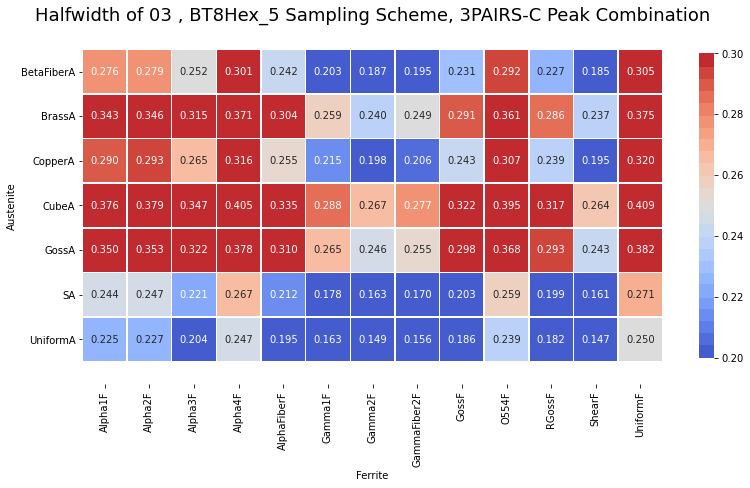

In [7]:
# Test Heatmap
#PlotTexture.PlotHeatmap(20,"2Pairs-A","TD Single",IntensitesPath)
#PlotTexture.PlotHeatmap(20,"3Pairs-A","ND Single",IntensitesPath)
#PlotTexture.PlotHeatmap(20,"1Pair-A","RotRing Axis-Y Res-5.0 Theta-2.79042653 OmegaMax-90",
                        #IntensitesPath, VF=.54,cbarRange=[0.40,0.68],save=True,savename='Chess-1pairA-omega90.png')
#PlotTexture.PlotHeatmap(20,"1Pair-A","RotRing Axis-Y Res-5.0 Theta-2.84623415 OmegaMax-90 Weighted",
                        #IntensitesPath, VF=.54,cbarRange=[0.40,0.68],save=True,savename='Chess-1pairA-omega90W.png')
#PlotTexture.PlotHeatmap(20,"1Pair-A","RotRing Axis-Y Res-5.0 Theta-2.79042653 OmegaMax-60",
                        #IntensitesPath, VF=.54,cbarRange=[0.40,0.68],save=True,savename='Chess-1pairA-omega60.png')
#PlotTexture.PlotHeatmap(20,"1Pair-A","RotRing Axis-Y Res-5.0 Theta-2.79042653 OmegaMax-30",
                        #IntensitesPath, VF=.54,cbarRange=[0.40,0.68],save=True,savename='Chess-1pairA-omega30.png')
#PlotTexture.PlotHeatmap(20,"3Pairs-C","RotRing Axis-Y Res-5.0 Theta-2.79042653 OmegaMax-90",
                        #IntensitesPath, VF=.54,cbarRange=[0.40,0.68],save=True,savename='Chess-3pairsC-omega90.png')
#PlotTexture.PlotHeatmap(10, "2Pairs-A", "Equal Angle", IntensitesPath, VF=.25, cbarRange=[0.2,0.3])
#PlotTexture.PlotHeatmap(20, "3Pairs-C", "HexGrid-90degTilt5degRes", IntensitesPath, VF=.25, cbarRange=[0.2,0.3])
PlotTexture.PlotHeatmap(3, "3Pairs-C", "BT8Hex_5", IntensitesPath, VF=.25, cbarRange=[0.2,0.3])
#PlotTexture.PlotHeatmap(20, "3Pairs-C", "CLR", IntensitesPath, VF=.25, cbarRange=[0.2,0.3])
#PlotTexture.PlotHeatmap(20, "2Pairs-A", "BT8Hex", IntensitesPath, VF=.25, cbarRange=[0.2,0.3])
#PlotTexture.PlotHeatmap(20, "3Pairs-C", "BT8Hex", IntensitesPath, VF=.25, cbarRange=[0.2,0.3])
#PlotTexture.PlotHeatmap(20,"3Pairs-C","RotRing Axis-Y Res-5.0 Theta-5.0 ",IntensitesPath,cbarMap='grey', cbarRange=[0.2,0.3])
#PlotTexture.PlotHeatmap(20, "1Pair-B", "OffsetF45", IntensitesPath, Scheme2="OffsetA45", cbarRange=[0.2,0.3])
#PlotTexture.PlotHeatmap(20, "1Pair-B", "OffsetFTD", IntensitesPath, Scheme2="OffsetATD", cbarRange=[0.2,0.3])

In [ ]:
# New Heatmap Function

def Heatmap(hw, Folder, schemelist=['Spiral5', 'CLR_5', 'HexGrid-90degTilt5degRes' , 'BT8Hex_5'], peaklist=['1Pair-A', '1Pair-B', '2Pairs-A','2Pairs-B', '3Pairs-A', '3Pairs-B', '3Pairs-C'],Scheme2=None, VF=0.25, cbarMap=False, cbarRange=[0,0.1], save=False, cmd=False, savename='test.png'):
    
    """
    
    """
    import fnmatch
    import os
    import pandas as pd
    import numpy as np
    import seaborn as sns
    from matplotlib import pyplot as plt
    from statistics import mean 

    datalist=[]
    for s in schemelist:
        for p in peaklist:
            datalist.append((s,p))
    
    if (hw==3):
        HW='03'
    elif (hw==5):
        HW='05'
    else:
        HW=str(hw)
    

    schemes=[]
    peaks=[]
    frac_list=[]
    range_list=[]
    for Scheme,PeakCombo in datalist:
        AusteniteTextures=[]
        FerriteTextures=[]  


        for file in os.listdir(Folder):
        
            if (file.find("A-HW"+HW)>0):
                AusteniteTextures.append(file)
            elif (file.find("F-HW"+HW)>0):
                FerriteTextures.append(file)
            else: ()
            
            #print (FerriteTextures)
            #print AusteniteTextures
        
        # Create as dictionary, easier for seaborn later, and single valued entries
        AustList=[]
        FerrList=[]
        VFList=[]
        AVFList=[] # for mins and maxes
        
        for AustOrient in AusteniteTextures:
            for FerrOrient in FerriteTextures:
            
                
                DFF=pd.read_excel(os.path.join(Folder,FerrOrient),header=1,skipfooter=0)
                DFA=pd.read_excel(os.path.join(Folder,AustOrient),header=1,skipfooter=0)

                if Scheme2 != None:
                
                    F_val=float(DFF.loc[DFF['HKL'] == Scheme][PeakCombo])
                    A_val=float(DFA.loc[DFA['HKL'] == Scheme2][PeakCombo])
                
                else :
                    # Revised, some issues with what's returned
                    # Pandas returns a larger array instead of just one value - AC 2021 Mar 29
                    F_val=float(DFF.loc[DFF['HKL'] == Scheme][PeakCombo])
                    A_val=float(DFA.loc[DFA['HKL'] == Scheme][PeakCombo])
                    #print (DFF)
                    #print (DFA)
                    
                #split at file type and halfwidth for names
                Fname=FerrOrient.split(".")[0].split("-")[0]
                Aname=AustOrient.split(".")[0].split("-")[0]
                
                # Append to lists
                AustList.append(Aname)
                FerrList.append(Fname)
                VFList.append(abs((VF*A_val/(VF*A_val+((1.0-VF)*F_val)))-0.25))
                AVFList.append((VF*A_val/(VF*A_val+((1.0-VF)*F_val)))-0.25)

            
        range_list.append('Min: '+str(round(min(AVFList),3)) + '\n' + 'Max: '+str(round(max(AVFList),3))) 
        frac_list.append(mean(VFList))
        schemes.append(Scheme)
        peaks.append(PeakCombo)

    dataDict={"Schemes":schemes, "Peak Combinations": peaks, "VF":frac_list}
    SaveTable=pd.pivot_table(pd.DataFrame.from_dict(dataDict),index="Schemes", columns="Peak Combinations")


    
    #used for debugging
    #return dataDict
    #return EmptyDF
    
    
    # Need to rename columns since pivot_tables return a multiindex data frame
    FerriteNames=[col[1] for col in SaveTable.columns.values]

 
    # I think this has been depricated- AC 29 Mar 2021
#    values[values == ''] = 0.0
#    Values = values.astype(np.float)
#    labels=[]
#    for val in Values:
#        if(val>=0.255):
#            labels.append("+")
#        elif(val<=0.245):
#            labels.append("-")
#        else:
#            labels.append("O")
#    labels=np.asarray(labels)
    #labels.resize(len(yaxis),len(xaxis)) 
    #labels=pd.DataFrame(labels)

    # plotting

    # aligning labels
    data={"Schemes":schemes, "Peak Combinations": peaks, "VF":range_list}
    Table=pd.pivot(pd.DataFrame.from_dict(data),index="Schemes", columns="Peak Combinations")
    
    
    
    if cbarMap=='grey':
        color= sns.diverging_palette(359, 359, 99, l=0, sep=1, n=50, center='light', as_cmap=True)
    
    else:
        color= sns.color_palette("coolwarm", 25)
    
    plt.figure(figsize = (13,7))
    figure=sns.heatmap(SaveTable, vmin=cbarRange[0], vmax=cbarRange[1], cmap='Blues', annot=Table, fmt= '',linewidths=0.5,square=True,cbar_kws={"shrink": .80}, xticklabels=FerriteNames)
    #figure=sns.heatmap(SaveTable2, vmin=cbarRange[0], vmax=cbarRange[1], cmap='Blues', annot=True, fmt= '', annot_kws={'alpha': 0.1}, linewidths=0.5,square=True,cbar_kws={"shrink": .80})
    figure.set_xlabel('Peak Combinations')
    #figure=sns.heatmap(df_wide,vmin=0.0, vmax=0.50, cmap=color,center=0.25,annot=dw, annot_kws={"size": 18},fmt='',linewidths=0.5,square=True,cbar_kws={"shrink": .80})
    plt.title("Plotting Phase Fraction Measurement Error for a Halfwidth of "+HW, fontsize =18)
    bottom, top = figure.get_ylim()
    figure.set_ylim(bottom + 0.5, top - 0.5)
    
    #return figure
    if save==True:
        plt.savefig(savename, bbox_inches='tight')

    if cmd==False:
        plt.show()


Heatmap(10, IntensitesPath)

In [18]:
# Get the current working directory path
cwd=os.getcwd()
#print cwd
xpcdatapath=os.path.abspath(os.path.join(os.path.dirname(cwd)))
#print xpcdatapath
# Use join instead, it's better cross platform
Folder=os.path.join(cwd,'AveragedIntensites')
DFA=pd.read_excel(os.path.join(Folder, 'o554F-HW20.xlsx'))
print(DFA)

    Unnamed: 0                            0          1          2          3  \
0            0                          HKL  [1, 1, 0]  [2, 0, 0]  [2, 1, 1]   
1            1                    ND Single       0.72       0.07       1.46   
2            2                    RD Single       1.97       0.22       0.84   
3            3                    TD Single       0.76       0.84       1.11   
4            4                       Morris       0.48       1.95       0.98   
5            5     Ring Perpendicular to ND    1.36918   0.363836    1.04959   
6            6     Ring Perpendicular to RD   0.860526   0.942632    1.10263   
7            7     Ring Perpendicular to TD    1.00105   0.883158    1.01421   
8            8         NoRotation-tilt60deg   0.766568     0.5409    1.25989   
9            9              Rotation-NoTilt       0.72       0.07    1.46124   
10          10           Rotation-60detTilt   0.843788   0.452584    1.26685   
11          11     HexGrid-90degTilt5deg

In [ ]:
# Plot Density Contours for texture components
import glob
def PlotTextureComponents(texComp,datafolder):
    cwd=os.getcwd()
    xpcdatapath=os.path.abspath(os.path.join(cwd, '..', 'MAUD', datafolder))
    for file in glob.glob(os.path.join(xpcdatapath, '*')):
        XPCfile=(os.path.join(xpcdatapath, file))
        (head,tail)=os.path.split(file)
                #Split for HW
        if "-" in tail:
            orientation, hw=tail.split('-')
        else:
            orientation, ext=tail.split('.')
                    
                
    #for XPCfile in listoffiles:
        if orientation==texComp:
            print("File from listdir: ",file)
            (pfs,hkllist)=TextureSampling.xpcformat('xpc',XPCfile)
            i=0
            for i in range(0,len(pfs)):
                tilt=0
                rot=0
                dip=[]
                strike=[]
                while(tilt<=90):
                    while(rot<=355):
                        weight=pfs[i].loc[tilt,rot].iloc[0]
                        dip.extend([tilt]*weight)
                        strike.extend([rot]*weight)
                        rot=rot+5
                    tilt=tilt+5
                    rot=0

                d = {'Tilt' : dip, 'Rotation' : strike}
                coordinates=pd.DataFrame(d)
                name=orientation+", "+str(hkllist[i+1])
                print(name+ " pole figure plots:")
                PlotTexture.DensityContourPlot(name, coordinates)
                tilt=0
                rot=0
                dip=[]
                strike=[]
                i=i+1
                
                

PlotTextureComponents("Alpha2F", "XPCFiles-HW20") #test function  


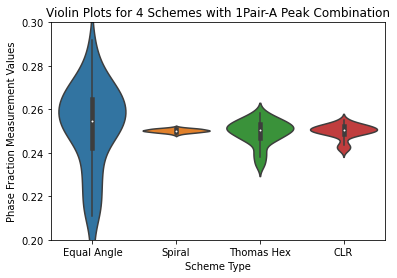

In [8]:
import fnmatch
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
def ViolinPlots(hw, PeakCombo, Folder, Schemelist=['Equal Angle', 'Spiral', 'BT8Hex', 'CLR'], VF=0.25, save=True, cmd=True, savename='samplevp.png'):
    HW=str(hw)
    AusteniteTextures=[]
    FerriteTextures=[] 

    for file in os.listdir(Folder):
    
        if (file.find("A-HW"+HW)>0):
            AusteniteTextures.append(file)
        elif (file.find("F-HW"+HW)>0):
            FerriteTextures.append(file)
        else: ()
        
        #print (FerriteTextures)
        #print AusteniteTextures
    
    CLRData=[]
    EAData=[]
    BT8HexData=[]
    HexData=[]
    SpiralData=[]
    for Scheme in Schemelist:
        if Scheme=='CLR':
            VFList=CLRData
        elif Scheme=='Equal Angle':
            VFList=EAData
        elif Scheme=='BT8Hex':
            VFList=BT8HexData
        elif Scheme=='Spiral':
            VFList=SpiralData
        else:
            VFList=HexData

        for AustOrient in AusteniteTextures:
            for FerrOrient in FerriteTextures:
        
            
                DFF=pd.read_excel(os.path.join(Folder,FerrOrient),header=1,skipfooter=0)
                DFA=pd.read_excel(os.path.join(Folder,AustOrient),header=1,skipfooter=0)

                # Revised, some issues with what's returned
                # Pandas returns a larger array instead of just one value - AC 2021 Mar 29
                F_val=float(DFF.loc[DFF['HKL'] == Scheme][PeakCombo])
                A_val=float(DFA.loc[DFA['HKL'] == Scheme][PeakCombo])
                #print (DFF)
                #print (DFA)
                
            
                # Append to lists
                VFList.append(VF*A_val/(VF*A_val+((1.0-VF)*F_val)))        
    
    VFList=[]

    df = pd.DataFrame({'Equal Angle': EAData, 'Spiral': SpiralData, 'Thomas Hex': BT8HexData, 'CLR': CLRData})
    ax= sns.violinplot(data=df, inner='box', scale= "count")
    ax.set_title("Violin Plots for "+ str(len(Schemelist))+ " Schemes with "+str(PeakCombo)+ " Peak Combination")
    ax.set_ylim([0.2,0.3])
    ax.set_ylabel("Phase Fraction Measurement Values")
    ax.set_xlabel("Scheme Type")


    if save==True:
        plt.savefig(savename, bbox_inches='tight')

    if cmd==False:
        plt.show()





ViolinPlots(20, "1Pair-A", IntensitesPath)
    

In [2]:

def AnalyzePeakCombinations(Scheme,PeakList=['1Pair-A', '2Pairs-A', '2Pairs-B', '3Pairs-A', '3Pairs-B', '3Pairs-C', '4Pairs', '5A4F','MaxUnique']):
    for peak in PeakList:
        PlotTexture.PlotHeatmap(20, peak, Scheme, IntensitesPath, cbarRange=[0.2,0.3])
    
AnalyzePeakCombinations("CLR")
        


NameError: name 'PlotTexture' is not defined

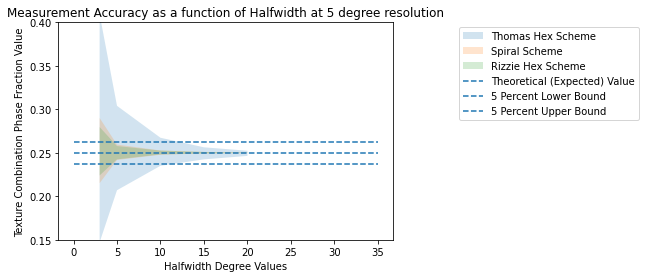

In [10]:
def AnalyzeHalfwidths(SchemeList=["BT8Hex_5", "Spiral5", "HexGrid-90degTilt5degRes"], HWList=[3,5,10,15,20], Folder=IntensitesPath, PeakCombo='3Pairs-C', VF=0.25):

    for Scheme in SchemeList:
        mini=[]
        maxi=[]

        for hw in HWList:
            if (hw==3):
                HW='03'
            elif (hw==5):
                HW='05'
            else:
                HW=str(hw)
            
            
            AusteniteTextures=[]
            FerriteTextures=[] 
            VFList=[]

            for file in os.listdir(Folder):
    
                if (file.find("A-HW"+HW)>0):
                    #print(file)
                    AusteniteTextures.append(file)

                elif (file.find("F-HW"+HW)>0):
                    #print(file)
                    FerriteTextures.append(file)
                else: ()
    

            for AustOrient in AusteniteTextures:
                for FerrOrient in FerriteTextures:
        
            
                    DFF=pd.read_excel(os.path.join(Folder,FerrOrient),header=1,skipfooter=0)
                    DFA=pd.read_excel(os.path.join(Folder,AustOrient),header=1,skipfooter=0)

                    # Revised, some issues with what's returned
                    # Pandas returns a larger array instead of just one value - AC 2021 Mar 29
                    F_val=float(DFF.loc[DFF['HKL'] == Scheme][PeakCombo])
                    A_val=float(DFA.loc[DFA['HKL'] == Scheme][PeakCombo])
                    #print (DFF)
                    #print (DFA)
                
            
                    # Append to lists
                    VFList.append(VF*A_val/(VF*A_val+((1.0-VF)*F_val)))
        
            mini.append(min(VFList))
            maxi.append(max(VFList))
            VFList=[]


        if (Scheme==SchemeList[0]):
            plt.fill_between(HWList,mini, y2=maxi, alpha=0.2, label='Thomas Hex Scheme')
        elif (Scheme==SchemeList[1]):
            plt.fill_between(HWList,mini, y2=maxi, alpha=0.2, label='Spiral Scheme')
        elif (Scheme==SchemeList[2]):
            plt.fill_between(HWList,mini, y2=maxi, alpha=0.2, label='Rizzie Hex Scheme')
        elif (Scheme==SchemeList[3]):
            pass
            #plt.fill_between(HWList,mini, y2=maxi, alpha=0.2, label='10 Degree Resolution')

        mini=[]
        maxi=[]
    



    plt.xlabel('Halfwidth Degree Values')
    plt.ylabel('Texture Combination Phase Fraction Value')
    plt.title('Measurement Accuracy as a function of Halfwidth at 5 degree resolution')
    plt.ylim(0.15,0.4)
    plt.hlines(0.25,xmin=0,xmax=35, linestyles='dashed', label='Theoretical (Expected) Value')
    plt.hlines(0.2375,xmin=0,xmax=35, linestyles='dashed', label='5 Percent Lower Bound')
    plt.hlines(0.2625,xmin=0,xmax=35, linestyles='dashed', label='5 Percent Upper Bound')
    plt.legend(bbox_to_anchor=(1.75, 1))
    plt.show()

AnalyzeHalfwidths()    
    

# Still needs to be migrated

## Generate average intensity based on pole figures and coordinates
- This section calculates the average intensity and saves to file
- Looks for the list of XPC files and calculates a table (.xlsx) for each

_Skip if you only wish to plot the sampling schemes_

# Plots

# Plot pole figures of sampling positions

## Plot all the Sampling methods

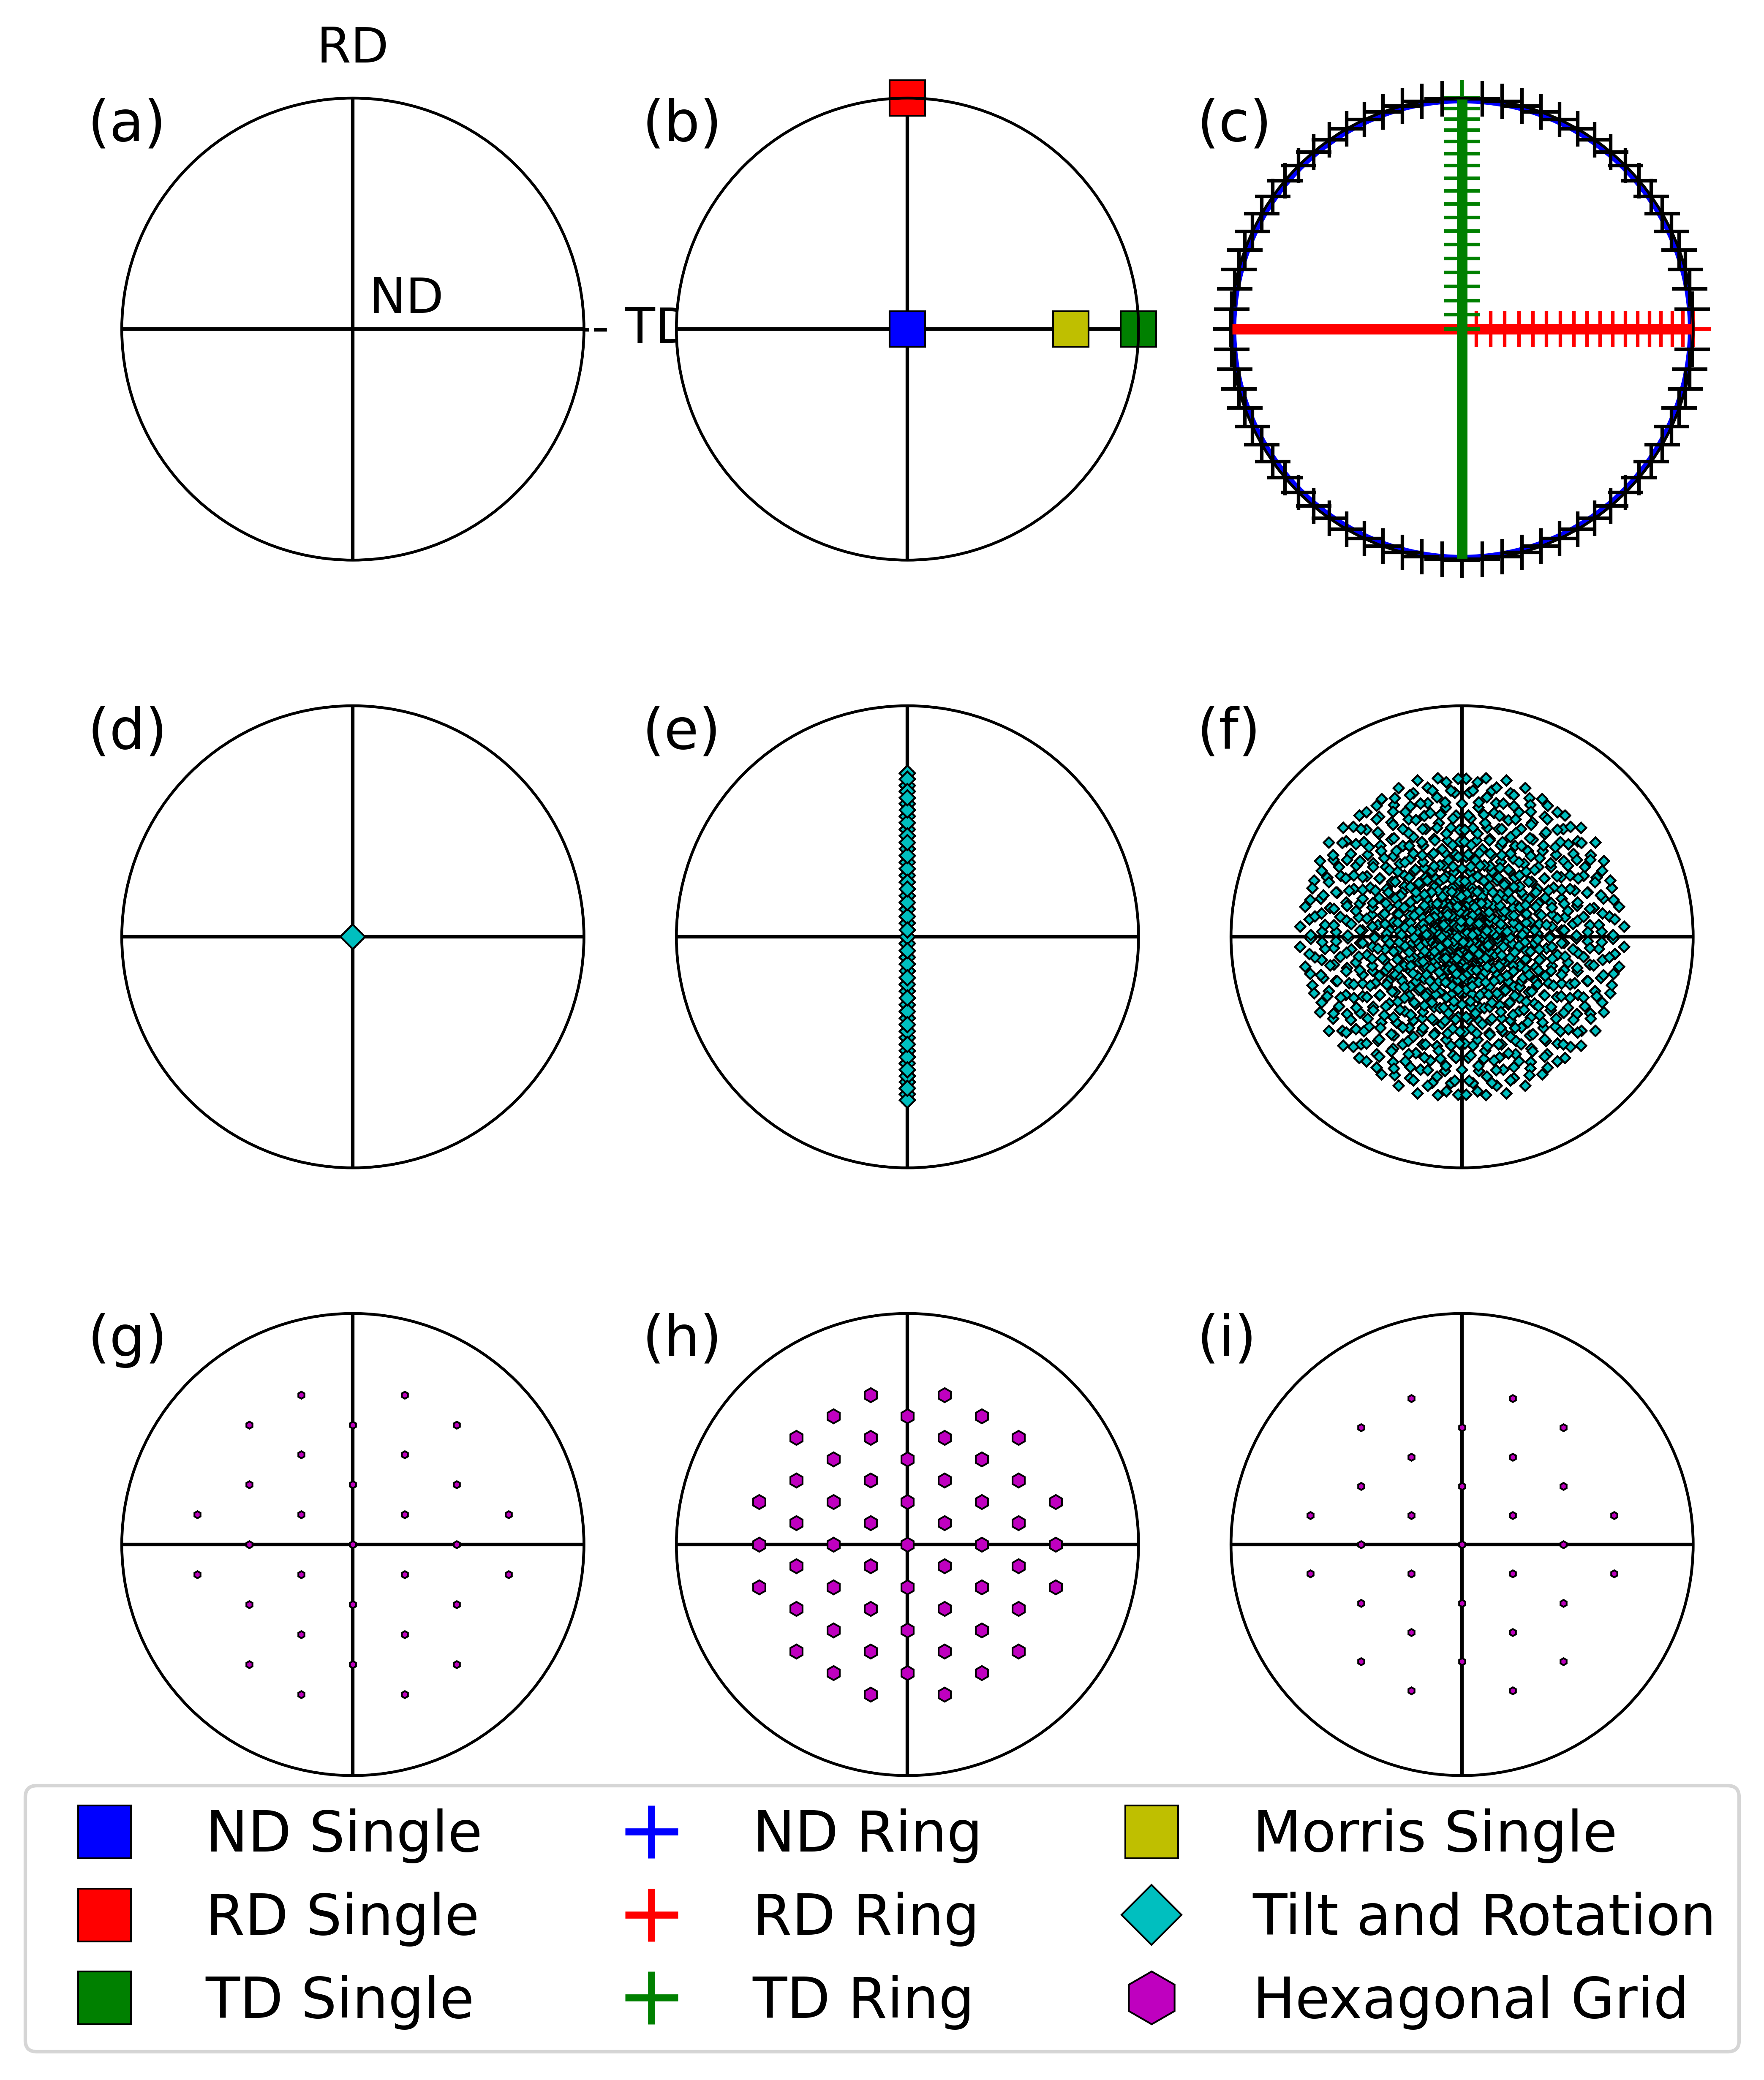

In [7]:
# Note - MPLStereonet uses a different angle convention (geosciences) than is used for crystallography
# A rotation of 90° is needed to align the coordiantes
# TD, Morris rotated by 270° to be in the same quadrant as Matlab
#dip = (Coordinates['Rotation']-90.0)


# 3 x 3 subplot grid
# single, ring, key
# Tilt/Rotate
# Hex Grids

fig = plt.figure(figsize=(8,9), dpi=600)


#key
ax1 = fig.add_subplot(331, projection='stereonet')
ax1.set_azimuth_ticks([0,90], labels=['RD','-- TD'],fontsize=14) 
ax1.plane(0.0, 90.0, 'k-', linewidth=1)
ax1.plane(90.0, 90.0, 'k-', linewidth=1)
ax1.annotate('(a)', xy=(0, 0), xytext=(-3.0,0.1), fontsize=16)
ax1.annotate('ND', xy=(0, 0), xytext=(0.1,0.1), fontsize=14)


#Single orientations

ax2 = fig.add_subplot(332, projection='stereonet')

ax2.plane(0.0, 90.0, 'k-', linewidth=1)
ax2.plane(90.0, 90.0, 'k-', linewidth=1)
            #if q==1: SchemeName,Coordinates=SingleOrientation("ND Single", 0.0,0.0)
            #elif q==2: SchemeName,Coordinates=SingleOrientation("RD Single", 90.0,0.0)
            #elif q==3: SchemeName,Coordinates=SingleOrientation("TD Single", 90.0,90.0)
            #elif q==4: SchemeName,Coordinates=SingleOrientation("Morris", 60.0,90.0)
                
SchemeName,Coordinates=TextureSampling.SingleOrientation("ND Single", 0.0,0.0)
dip, strike =Coordinates['Tilt'], (Coordinates['Rotation']-90.0)
l1=ax2.pole(strike, dip, 'bs', markersize=10, clip_on=False,markeredgecolor='black', markeredgewidth=0.5)

SchemeName,Coordinates=TextureSampling.SingleOrientation("RD Single", 90.0,180.0)
dip, strike =Coordinates['Tilt'], (Coordinates['Rotation']-90.0)
l2=ax2.pole(strike, dip, 'rs', markersize=10, clip_on=False,markeredgecolor='black', markeredgewidth=0.5)

SchemeName,Coordinates=TextureSampling.SingleOrientation("TD Single", 90.0,270.0)
dip, strike =Coordinates['Tilt'], (Coordinates['Rotation']-90.0)
l3=ax2.pole(strike, dip, 'gs', markersize=10, clip_on=False,markeredgecolor='black', markeredgewidth=0.5)

SchemeName,Coordinates=TextureSampling.SingleOrientation("Morris", 60.0,270.0)
dip, strike =Coordinates['Tilt'], (Coordinates['Rotation']-90.0)
l4=ax2.pole(strike, dip, 'ys', markersize=10, clip_on=False, markeredgecolor='black', markeredgewidth=0.5)

ax2.set_azimuth_ticks([90,0], labels=['',''])
ax2.annotate('(b)', xy=(0, 0), xytext=(-3.0,0.1), fontsize=16)

#ax1.grid()
#for index, row in Coordinates.iterrows():
    #print row['Tilt'], row['Rotation']
    #dip, strike =  row['Tilt'], row['Rotation']
    #ax1.pole(strike, dip, 'g^', markersize=5)
    
    
    #ax.plane(strike, dip, 'g-', linewidth=2)
    #ax.rake(strike, dip, -70)
    
# Ring Orientations
ax3 = fig.add_subplot(333, projection='stereonet')
ax3.annotate('(c)', xy=(0, 0), xytext=(-3.0,0.1), fontsize=16)
ax3.set_azimuth_ticks([90,0], labels=['','']) 


SchemeName,Coordinates=TextureSampling.RingPerpND(5.0)
ax3.plane(0.0, 0.0, 'b-', linewidth=3)
ax3.plane(0.0, 180.0, 'b-', linewidth=3)
for index, row in Coordinates.iterrows():
    #print row['Tilt'], row['Rotation']
    dip, strike =  row['Tilt'], (row['Rotation']-90.0)
    ax3.pole(strike, dip, 'k+', markersize=10, clip_on=False)



SchemeName,Coordinates=TextureSampling.RingPerpRD(5.0)
ax3.plane(-90.0, 90.0, 'r-', linewidth=3) #0.0 (RD)-90.0 (Strike Converntion ) = -90.0Dip
for index, row in Coordinates.iterrows():
    #print row['Tilt'], row['Rotation']
    dip, strike =  row['Tilt'], (row['Rotation']-90.0)
    ax3.pole(strike, dip, 'r+', markersize=10, clip_on=False)


SchemeName,Coordinates=TextureSampling.RingPerpTD(5.0)
ax3.plane(0.0, 90.0, 'g-', linewidth=3)#90.0 (TD)-90.0 (Strike Converntion ) = 0.0Dip
for index, row in Coordinates.iterrows():
    #print row['Tilt'], row['Rotation']
    dip, strike =  row['Tilt'], (row['Rotation']-90.0)
    ax3.pole(strike, dip, 'g+', markersize=10, clip_on=False)






ax4 = fig.add_subplot(334, projection='stereonet')
ax4.annotate('(d)', xy=(0, 0), xytext=(-3.0,0.1), fontsize=16)
ax4.set_azimuth_ticks([90,0], labels=['','']) 
ax4.plane(0.0, 90.0, 'k-', linewidth=1)
ax4.plane(90.0, 90.0, 'k-', linewidth=1)
SchemeName,Coordinates=TextureSampling.TiltRotate("Rotation-NoTilt", 120.0, 1600.0, 30.0,0.0,56.0)
for index, row in Coordinates.iterrows():
    #print row['Tilt'], row['Rotation']
    dip, strike =  row['Tilt'], (row['Rotation']-90.0)
    ax4.pole(strike, dip, 'cD', markersize=5, clip_on=False,markeredgecolor='black', markeredgewidth=0.5)



ax5 = fig.add_subplot(335, projection='stereonet')
ax5.annotate('(e)', xy=(0, 0), xytext=(-3.0,0.1), fontsize=16)
ax5.plane(0.0, 90.0, 'k-', linewidth=1)
ax5.plane(90.0, 90.0, 'k-', linewidth=1)
ax5.set_azimuth_ticks([90,0], labels=['','']) 
SchemeName,Coordinates=TextureSampling.TiltRotate("NoRotation-tilt60deg", 120.0, 1600.0, 0.0,60.0,56.0)
for index, row in Coordinates.iterrows():
    #print row['Tilt'], row['Rotation']
    dip, strike =  row['Tilt'], (row['Rotation']-90.0)
    ax5.pole(strike, dip, 'cD', markersize=3, clip_on=False,markeredgecolor='black', markeredgewidth=0.5)


ax6 = fig.add_subplot(336, projection='stereonet')
ax6.annotate('(f)', xy=(0, 0), xytext=(-3.0,0.1), fontsize=16)
ax6.plane(0.0, 90.0, 'k-', linewidth=1)
ax6.plane(90.0, 90.0, 'k-', linewidth=1)
ax6.set_azimuth_ticks([90,0], labels=['','']) 
SchemeName,Coordinates=TextureSampling.TiltRotate("Rotation-60detTilt", 120.0, 5000.0, 30.0,60.0,56.0)
for index, row in Coordinates.iterrows():
    #print row['Tilt'], row['Rotation']
    dip, strike =  row['Tilt'], (row['Rotation']-90.0)
    ax6.pole(strike, dip, 'cD', markersize=2, clip_on=False,markeredgecolor='black', markeredgewidth=0.5)


    
# Hex Grids

ax7 = fig.add_subplot(337, projection='stereonet')
ax7.annotate('(g)', xy=(0, 0), xytext=(-3.0,0.1), fontsize=16)
ax7.plane(0.0, 90.0, 'k-', linewidth=1)
ax7.plane(90.0, 90.0, 'k-', linewidth=1)
ax7.set_azimuth_ticks([90,0], labels=['',''])
#MCchanges
SchemeName,Coordinates=TextureSampling.HexGrid("HexGrid-90degTilt5degRes",60.0,21.0)
#SchemeName,Coordinates=HexGrid("HexGrid-90degTilt5degRes",90.0,5.0)
#MCchanges
for index, row in Coordinates.iterrows():
    #print row['Tilt'], row['Rotation']
    dip, strike =  row['Tilt'], (row['Rotation']-90.0)
    ax7.pole(strike, dip, 'mh', markersize=2, clip_on=False,markeredgecolor='black', markeredgewidth=0.5)


ax8 = fig.add_subplot(338, projection='stereonet')
ax8.annotate('(h)', xy=(0, 0), xytext=(-3.0,0.1), fontsize=16)
ax8.plane(0.0, 90.0, 'k-', linewidth=1)
ax8.plane(90.0, 90.0, 'k-', linewidth=1)
ax8.set_azimuth_ticks([90,0], labels=['','']) 
#MCchanges
#SchemeName,Coordinates=HexGrid("HexGrid-90degTilt22p5degRes",90.0,22.0)
SchemeName,Coordinates=TextureSampling.HexGrid("HexGrid-90degTilt22p5degRes",60.0,15)
#MCchanges
for index, row in Coordinates.iterrows():
    #print row['Tilt'], row['Rotation']
    dip, strike =  row['Tilt'], (row['Rotation']-90.0)
    ax8.pole(strike, dip, 'mh', markersize=4, clip_on=False,markeredgecolor='black', markeredgewidth=0.5)



ax9 = fig.add_subplot(339, projection='stereonet')
ax9.annotate('(i)', xy=(0, 0), xytext=(-3.0,0.1), fontsize=16)
ax9.plane(0.0, 90.0, 'k-', linewidth=1)
ax9.plane(90.0, 90.0, 'k-', linewidth=1)
ax9.set_azimuth_ticks([90,0], labels=['','']) 
#MCchanges
SchemeName,Coordinates=TextureSampling.HexGrid("HexGrid-60degTilt5degRes",60.0,20.5)
#SchemeName,Coordinates=HexGrid("HexGrid-60degTilt5degRes",60.0,5.0)
#MCchanges
for index, row in Coordinates.iterrows():
    #print row['Tilt'], row['Rotation']
    dip, strike =  row['Tilt'], (row['Rotation']-90.0)
    ax9.pole(strike, dip, 'mh', markersize=2, clip_on=False,markeredgecolor='black', markeredgewidth=0.5)


# Legend
import matplotlib.lines as mlines
blue_dot = mlines.Line2D([], [], color='white', marker='s', mfc='b',
                          markersize=15, label='',markeredgecolor='black', markeredgewidth=0.5)
red_dot = mlines.Line2D([], [], color='white', marker='s', mfc='r',
                          markersize=15, label='',markeredgecolor='black', markeredgewidth=0.5)
green_dot = mlines.Line2D([], [], color='white', marker='s', mfc='g',
                          markersize=15, label='',markeredgecolor='black', markeredgewidth=0.5)
yellow_dot = mlines.Line2D([], [], color='white', marker='s', mfc='y',
                          markersize=15, label='',markeredgecolor='black', markeredgewidth=0.5)

blue_plus = mlines.Line2D([], [], color='white', marker='+', mec='b', mew=2.0,
                          markersize=15, label='')
red_plus = mlines.Line2D([], [], color='white', marker='+', mec='r',mew=2.0,
                          markersize=15, label='')
green_plus = mlines.Line2D([], [], color='white', marker='+', mec='g',mew=2.0,
                          markersize=15, label='')

cyan_square = mlines.Line2D([], [], color='white', marker='D', mfc='c',
                          markersize=12, label='',markeredgecolor='black', markeredgewidth=0.5)

mag_hex = mlines.Line2D([], [], color='white', marker='h', mfc='m',
                          markersize=15, label='',markeredgecolor='black', markeredgewidth=0.5)

handles=[blue_dot, red_dot, green_dot,  blue_plus, red_plus, green_plus, yellow_dot, cyan_square, mag_hex]
labels=['ND Single','RD Single','TD Single', 'ND Ring','RD Ring','TD Ring','Morris Single', 'Tilt and Rotation', 'Hexagonal Grid' ]


#plt.figlegend((handles),(labels),'lower center', numpoints=1, ncol=3,fontsize=16,bbox_to_anchor=[0.46, -0.015])
plt.figlegend((handles),(labels),'lower center', numpoints=1, ncol=3,fontsize=16)


#swtich between saving figure and showing the figure

#plt.savefig("SamplingSchemes-Draft.eps", dpi=600,format="eps")
#plt.savefig("SamplingSchemes-Draft.pdf", dpi=600,format="pdf")
plt.savefig("SamplingSchemes-Draft.png", dpi=600,format="png")
plt.show()

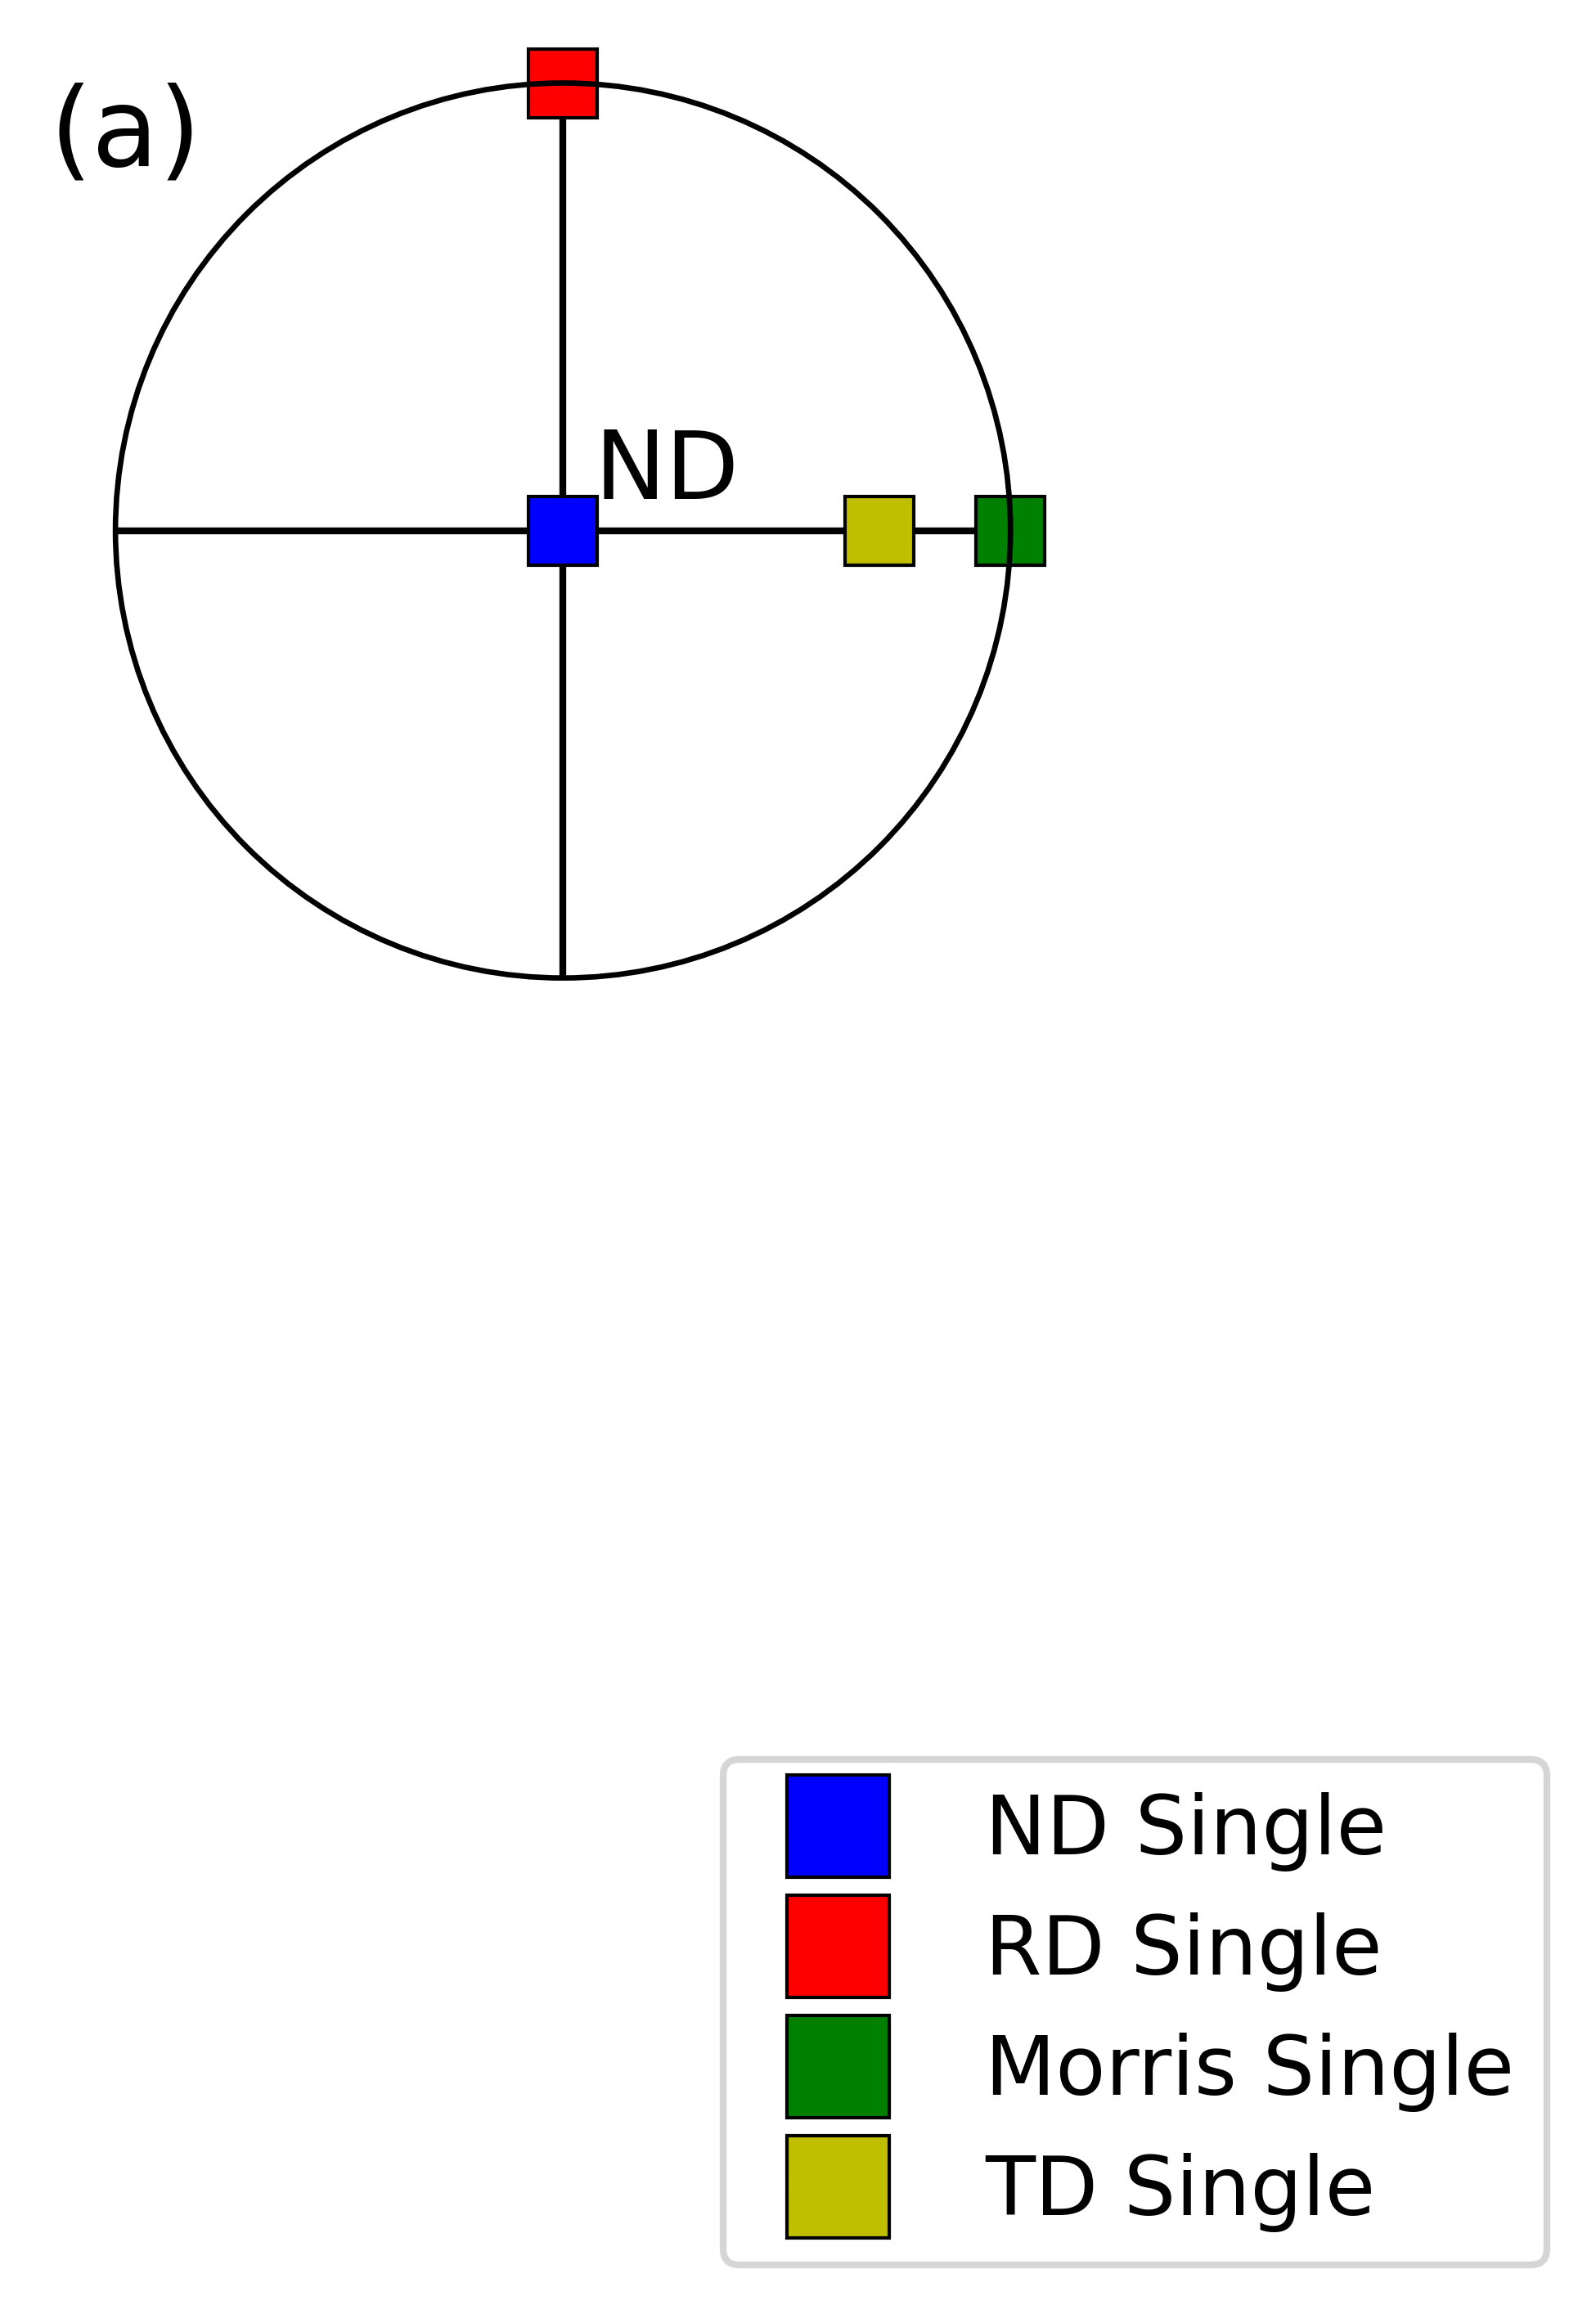

In [22]:
fig = plt.figure(figsize=(8,9), dpi=600)
ax1 = fig.add_subplot(331, projection='stereonet')

ax1.plane(0.0, 90.0, 'k-', linewidth=1)
ax1.plane(90.0, 90.0, 'k-', linewidth=1)
            #if q==1: SchemeName,Coordinates=SingleOrientation("ND Single", 0.0,0.0)
            #elif q==2: SchemeName,Coordinates=SingleOrientation("RD Single", 90.0,0.0)
            #elif q==3: SchemeName,Coordinates=SingleOrientation("TD Single", 90.0,90.0)
            #elif q==4: SchemeName,Coordinates=SingleOrientation("Morris", 60.0,90.0)
                
SchemeName,Coordinates=TextureSampling.SingleOrientation("ND Single", 0.0,0.0)
dip, strike =Coordinates['Tilt'], (Coordinates['Rotation']-90.0)
l1=ax1.pole(strike, dip, 'bs', markersize=10, clip_on=False,markeredgecolor='black', markeredgewidth=0.5)

SchemeName,Coordinates=TextureSampling.SingleOrientation("RD Single", 90.0,180.0)
dip, strike =Coordinates['Tilt'], (Coordinates['Rotation']-90.0)
l2=ax1.pole(strike, dip, 'rs', markersize=10, clip_on=False,markeredgecolor='black', markeredgewidth=0.5)

SchemeName,Coordinates=TextureSampling.SingleOrientation("TD Single", 90.0,270.0)
dip, strike =Coordinates['Tilt'], (Coordinates['Rotation']-90.0)
l3=ax1.pole(strike, dip, 'gs', markersize=10, clip_on=False,markeredgecolor='black', markeredgewidth=0.5)

SchemeName,Coordinates=TextureSampling.SingleOrientation("Morris", 60.0,270.0)
dip, strike =Coordinates['Tilt'], (Coordinates['Rotation']-90.0)
l4=ax1.pole(strike, dip, 'ys', markersize=10, clip_on=False, markeredgecolor='black', markeredgewidth=0.5)

ax1.set_azimuth_ticks([90,0], labels=['',''])
ax1.annotate('(a)', xy=(0, 0), xytext=(-3.0,0.1), fontsize=16)
ax1.annotate('ND', xy=(0, 0), xytext=(0.1,0.1), fontsize=14)

import matplotlib.lines as mlines
blue_dot = mlines.Line2D([], [], color='white', marker='s', mfc='b',
                          markersize=15, label='',markeredgecolor='black', markeredgewidth=0.5)
red_dot = mlines.Line2D([], [], color='white', marker='s', mfc='r',
                          markersize=15, label='',markeredgecolor='black', markeredgewidth=0.5)
green_dot = mlines.Line2D([], [], color='white', marker='s', mfc='g',
                          markersize=15, label='',markeredgecolor='black', markeredgewidth=0.5)
yellow_dot = mlines.Line2D([], [], color='white', marker='s', mfc='y',
                          markersize=15, label='',markeredgecolor='black', markeredgewidth=0.5)


handles=[blue_dot, red_dot, green_dot, yellow_dot]
labels=['ND Single','RD Single', 'Morris Single', 'TD Single']


#plt.figlegend((handles),(labels),'lower center', numpoints=1, ncol=3,fontsize=16,bbox_to_anchor=[0.46, -0.015])
plt.figlegend((handles),(labels),'upper right', numpoints=1, ncol=1,fontsize=12, bbox_to_anchor=[0.5, 0.5])


